In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

In [14]:
#importing the dataset
dataset= pd.read_csv("/Users/rupeshkumar/Downloads/KPMG - EDA_final assessment 2/KPMG - EDA/df.csv", na_values = "-")
dataset

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.90,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


# Data Cleaning

In [15]:
dataset['risk_level'].replace({1:'Low', 2:'Moderately Low', 3:'Moderate', 4:'Moderately High', 5:'High', 6:'Very High'},inplace=True)

In [16]:
# checking the size of data (rows,columns)
dataset.shape

(814, 20)

In [17]:
# checking for non-null values and column, checking if the datatypes are correct
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [18]:
#checking null values
dataset.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [19]:
#checking for duplicates
dataset.duplicated().sum()

0

In [20]:
#checking null values in 3years and 5years
dataset[dataset['returns_3yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
61,AXIS Floater Fund,1000,5000,0.16,416.0,2,Aditya Pagaria,NaN,NaN,NaN,NaN,NaN,Moderately Low,Axis Mutual Fund,2,Debt,Floater Mutual Funds,5.8,NaN,NaN
104,Baroda BNP Paribas Banking & PSU Bond Fund,500,5000,0.39,40.0,2,Prashant Pimple,NaN,NaN,NaN,NaN,NaN,Moderately Low,Baroda BNP Paribas Mutual Fund,2,Debt,Banking and PSU Mutual Funds,2.5,NaN,NaN
125,BHARAT Bond FOF – April 2025 – Direct Growth,500,1000,0.06,3912.0,3,Dhawal Dalal,NaN,NaN,NaN,NaN,NaN,Moderately Low,Edelweiss Mutual Fund,2,Other,FoFs Domestic,2.6,NaN,NaN
154,DSP Floater Fund,500,500,0.24,983.0,2,Kedar Karnik,NaN,NaN,NaN,NaN,NaN,Moderately Low,DSP Mutual Fund,1,Debt,Floater Mutual Funds,4.4,NaN,NaN
398,Invesco India Medium Duration Fund,1000,1000,0.40,306.0,2,Vikas Garg,NaN,NaN,NaN,NaN,NaN,Moderate,Invesco Mutual Fund,2,Debt,Medium Duration Funds,3.5,NaN,NaN
411,ITI Banking & PSU Debt Fund,500,5000,0.15,27.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,5,Debt,Banking and PSU Mutual Funds,5.4,NaN,NaN
412,ITI Dynamic Bond Fund,500,5000,0.14,57.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,5,Debt,Dynamic Bond,5.7,NaN,NaN
417,ITI Ultra Short Duration Fund,500,5000,0.10,119.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,NaN,NaN
495,Mahindra Manulife Short Duration Fund,500,1000,0.29,43.0,2,Rahul Pal,NaN,NaN,NaN,NaN,NaN,Moderate,Mahindra Manulife Mutual Fund,3,Debt,Short Duration Funds,4.4,NaN,NaN
497,Mirae Asset Banking and PSU Debt Fund,1000,5000,0.34,89.0,3,Basant Bafna,NaN,NaN,NaN,NaN,NaN,Moderately Low,Mirae Asset Mutual Fund,3,Debt,Banking and PSU Mutual Funds,3.7,NaN,NaN


In [21]:
#there are null values becuase the age of the fund is less than 3 years, so there are null values for 3 years
#the same applies for 5 years if the age of the stock is less than 5 years

In [22]:
dataset[dataset['returns_5yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
38,Aditya Birla SL Overnight Fund,0,5000,0.07,13399.0,4,Kaustubh Gupta,0.11,0.58,0.35,0.43,0.02,Low,Aditya Birla Sun Life Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
41,Aditya Birla SL Retirement-The 30s Plan-Dir Gr...,500,1000,1.06,258.0,4,Dhaval Shah,2.41,-5.61,14.94,0.84,0.94,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,0.0,17.9,NaN
42,Aditya Birla SL Retirement-The 40s Plan-Dir Gr...,500,1000,1.07,91.0,4,Dhaval Shah,2.34,-3.14,11.86,0.77,0.93,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,-0.1,15.0,NaN
43,Aditya Birla SL Retirement-The 50s Plan-Dir Gr...,500,1000,0.63,27.0,4,Dhaval Shah,0.29,-2.04,2.99,0.34,0.13,Moderately High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,3.0,4.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,UTI-Equity Savings Fund,0,5000,0.68,257.0,5,V Srivatsa,4.06,3.98,5.99,0.91,1.75,Moderate,UTI Mutual Fund,4,Hybrid,Equity Savings Mutual Funds,6.1,14.7,NaN
786,UTI-Floater Fund,500,500,0.35,1637.0,4,Sudhir Agrawal,3.07,3.41,1.05,1.41,1.45,Moderately Low,UTI Mutual Fund,3,Debt,Floater Mutual Funds,5.1,5.9,NaN
801,UTI-Nifty Next 50 Index Fund,0,5000,0.33,1926.0,5,Sharwan Kumar Goyal,1.71,-4.62,18.16,0.99,0.97,Very High,UTI Mutual Fund,2,Other,Index Funds,-6.4,22.2,NaN
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,Low,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN


In [23]:
# hence proved
#now filling the null values with mean by category of the stock

In [24]:
#calculating mean for returns using groupby function
mean_returns_by_category = dataset.groupby('category').agg({'returns_3yr': 'mean' ,'returns_5yr': 'mean'})
mean_returns_by_category

,returns_3yr,returns_5yr
category,,
Debt,6.228517,6.385446
Equity,29.738111,12.069767
Hybrid,15.272414,8.581053
Other,20.792405,10.710938
Solution Oriented,18.167857,9.747059


In [25]:
#calculating mean for ratios by category('sortino','alpha','sd','beta','sharpe')
mean_ratios_by_category = dataset.groupby('category').agg({'sortino': 'mean', 'alpha': 'mean', 'sd': 'mean', 
                                                           'beta':'mean', 'sharpe': 'mean'})
mean_ratios_by_category

,sortino,alpha,sd,beta,sharpe
category,,,,,
Debt,2.139885,2.160000,2.092107,0.807214,0.892366
Equity,3.110392,3.402550,16.959477,0.878642,1.459837
Hybrid,2.776552,2.486034,7.493190,0.707155,1.311638
Other,2.420633,0.513594,15.480506,0.850938,1.090253
Solution Oriented,2.589286,0.700357,10.272143,0.765714,1.204286


In [26]:
#filling the missing values with mean
dataset['returns_3yr'] = dataset.groupby('category')['returns_3yr'].transform(lambda x: x.fillna(x.mean()))
dataset['returns_5yr'] = dataset.groupby('category')['returns_5yr'].transform(lambda x: x.fillna(x.mean()))
dataset['sortino'] = dataset.groupby('category')['sortino'].transform(lambda x: x.fillna(x.mean()))
dataset['alpha'] = dataset.groupby('category')['alpha'].transform(lambda x: x.fillna(x.mean()))
dataset['sd'] = dataset.groupby('category')['sd'].transform(lambda x: x.fillna(x.mean()))
dataset['beta'] = dataset.groupby('category')['beta'].transform(lambda x: x.fillna(x.mean()))
dataset['sharpe'] = dataset.groupby('category')['sharpe'].transform(lambda x: x.fillna(x.mean()))
dataset.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [27]:
dataset.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.640883,2.464598,10.084476,0.822852,1.197011,2.641278,3.921376,18.254880,9.389900
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.374909,3.859215,7.808093,1.275605,0.531163,1.463476,6.675502,12.101639,3.497044
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.810000,0.513594,2.092107,0.710000,0.894275,2.000000,1.500000,6.228517,6.389085
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.825000,1.885000,11.870000,0.850938,1.290000,3.000000,4.400000,18.050000,8.800000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.460000,3.727500,16.410000,0.960000,1.540000,4.000000,5.600000,27.000000,12.069767
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,5.000000,130.800000,71.400000,23.200000


# Data Visualization and EDA

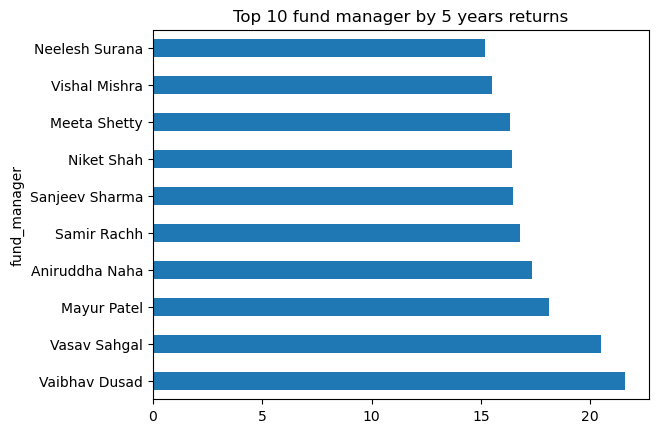

In [30]:
x = dataset.groupby('fund_manager')['returns_5yr'].mean().nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')
plt.show()

In [31]:
#creating category wise DataFrames
Debt = dataset[dataset['category'] == "Debt"]
Equity = dataset[dataset['category'] == "Equity"]
Hybrid = dataset[dataset['category'] == "Hybrid"]
Other = dataset[dataset['category'] == "Other"]
Solution = dataset[dataset['category'] == "Solution"]

In [32]:
top_5_debt = Debt.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_equity = Equity.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_hybrid = Hybrid.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_solution = Solution.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_other = Other.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()

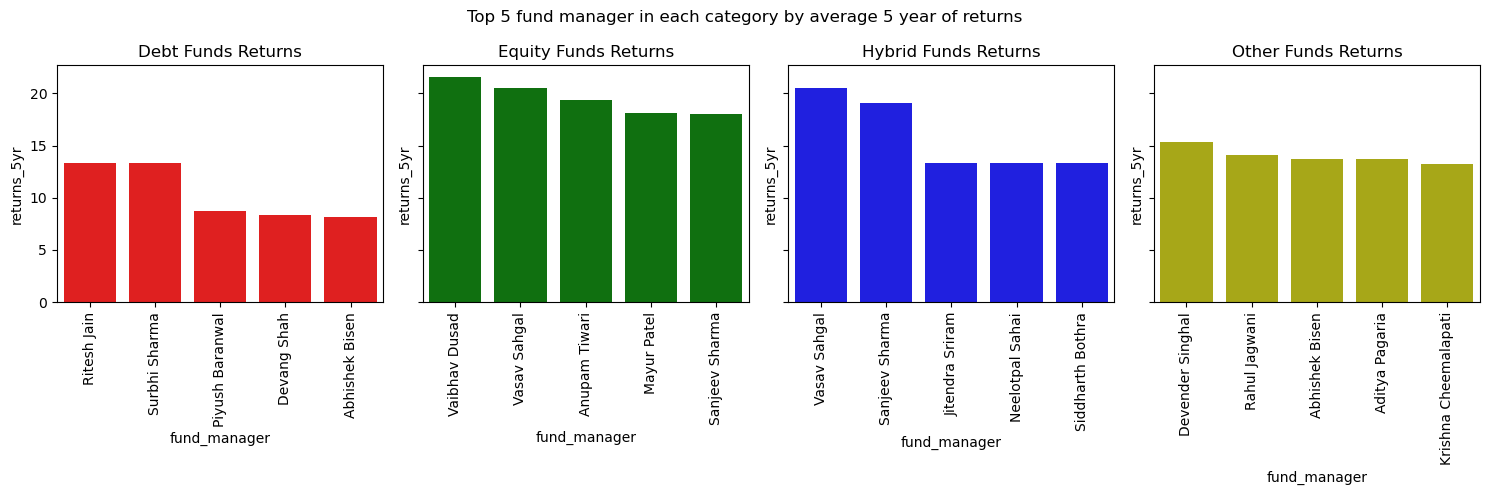

In [33]:
# create the plot
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15, 5),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0], color='r')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1], color='g')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2], color='b')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[3], color='y')

# set plot title and x labels
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')

ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')

ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')

ax[3].set_title('Other Funds Returns')
ax[3].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')

#final plot
plt.suptitle('Top 5 fund manager in each category by average 5 year of returns')
plt.tight_layout()
plt.show()

Conclusion:

In the Debt category Ritesh Jain has managed to give higest returns.

In the Equity category Vaibhav Dusad has managed to give highest returns.

In the Hybrid category Vasav Sahgal has managed to give highest returns.

In the Solution Funds category Srinivasan Ramamurthy has managed to give highest returns.

In the Other Funds category Devender Singhal has managed to give highest returns.

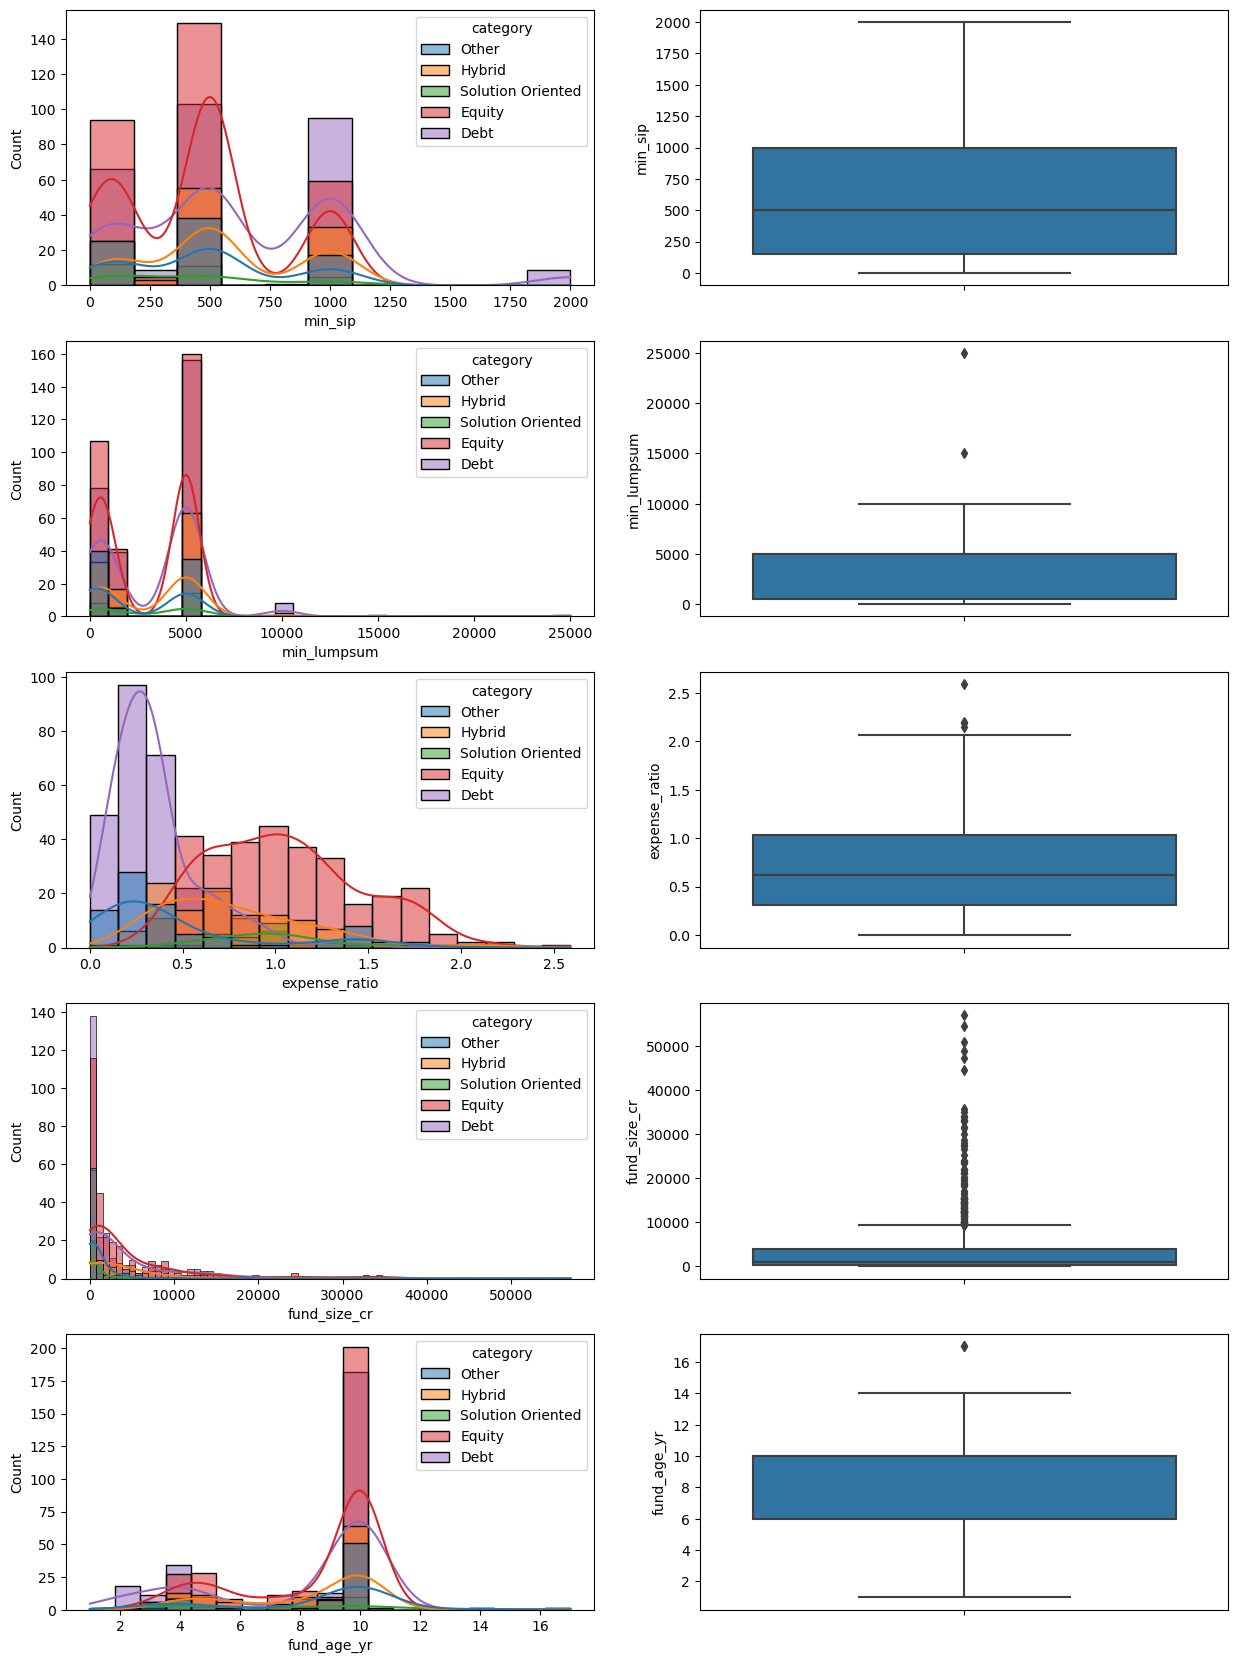

In [34]:
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(15, 8))

sns.histplot(dataset, x='min_sip',hue='category',ax=ax[0,0],kde=True)
sns.histplot(dataset, x='min_lumpsum',hue='category',ax=ax[1,0],kde=True)
sns.histplot(dataset, x='expense_ratio', hue='category',ax=ax[2,0],kde=True)
sns.histplot(dataset, x='fund_size_cr',hue='category',ax=ax[3,0],kde=True)
sns.histplot(dataset, x='fund_age_yr',hue='category', ax=ax[4,0],kde=True)


sns.boxplot(data = dataset, y=dataset['min_sip'],ax=ax[0,1])
sns.boxplot(data = dataset, y=dataset['min_lumpsum'],ax=ax[1,1])
sns.boxplot(data = dataset, y=dataset['expense_ratio'],ax=ax[2,1])
sns.boxplot(data = dataset, y=dataset['fund_size_cr'], ax=ax[3,1])
sns.boxplot(data = dataset, y=dataset['fund_age_yr'],ax=ax[4,1])




plt.subplots_adjust(bottom=5,top=7)

Conclusion

Most of the funds have Minimum SIP amount as 0,500 and 1000

Most of the funds have Minimum Lumpsum amount between 0 to 5000

Expense ratio of most of the schemes lies between 0 to 1

Most of the fund size is less than 2000 Cr. and has lot of outliers

Recent funds are mostly Debt funds, More than 4 year age funds are Equity type followed by Debt.


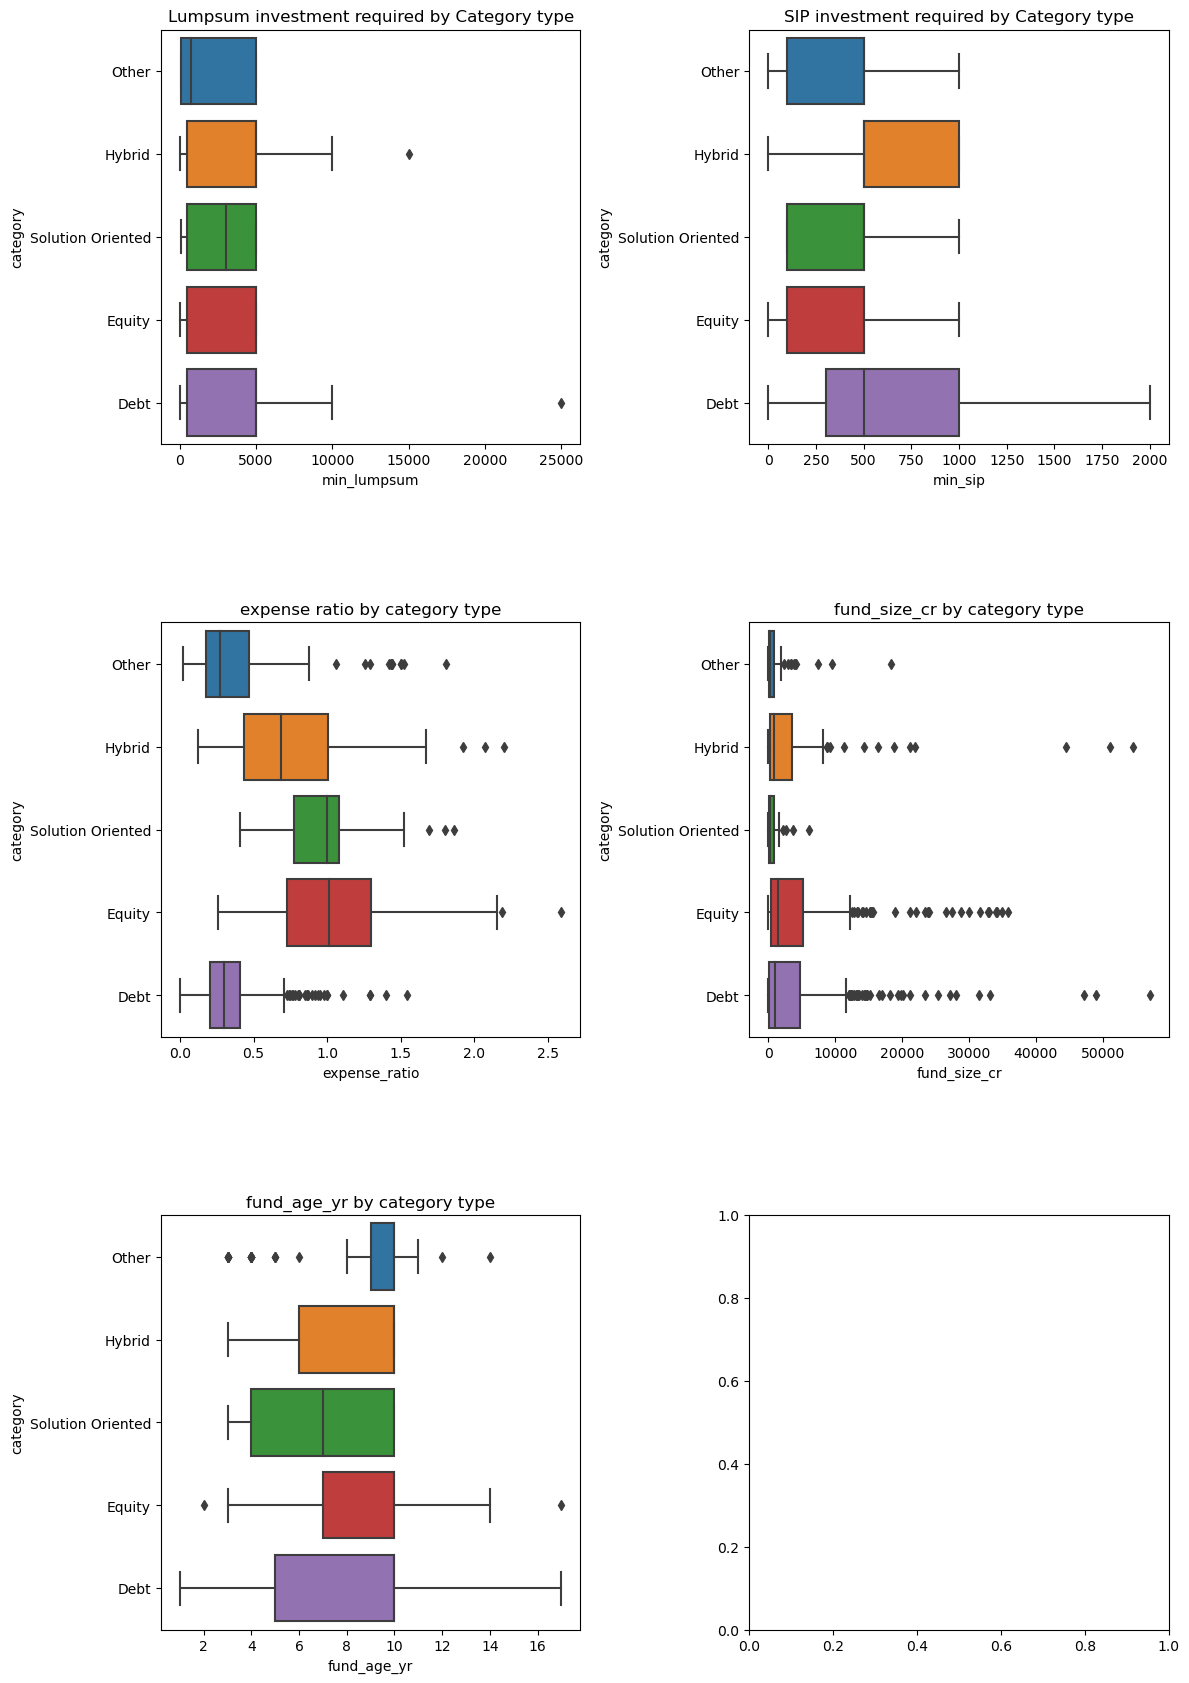

In [35]:
# distribution of data by category type
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

sns.boxplot(data = dataset,y=dataset['category'],x=dataset['min_lumpsum'],ax=axes[0,0])
sns.boxplot(data = dataset,y=dataset['category'],x=dataset['min_sip'],ax=axes[0,1])
sns.boxplot(dataset,y=dataset['category'],x=dataset['expense_ratio'],ax=axes[1,0])
sns.boxplot(dataset, y=dataset['category'], x=dataset['fund_size_cr'],ax=axes[1,1])
sns.boxplot(dataset, y=dataset['category'], x=dataset['fund_age_yr'],ax=axes[2,0])

axes[0,0].set_title('Lumpsum investment required by Category type')
axes[0,1].set_title('SIP investment required by Category type')
axes[1,0].set_title('expense ratio by category type')
axes[1,1].set_title('fund_size_cr by category type')
axes[2,0].set_title('fund_age_yr by category type')

plt.tight_layout()
plt.subplots_adjust(bottom=8,top=10)
plt.show()

Conclusion

#Across fund type lumpum investment is almost same.

#Across fund type sip investment is high among Hybrid and Debt funds.

#Equity and Solution oriented funds have the highest expense ratio among funds.

#Across fund type size cr highiest is among equity and Debt funds.

#Across fund type age yr Debt has most recent funds.

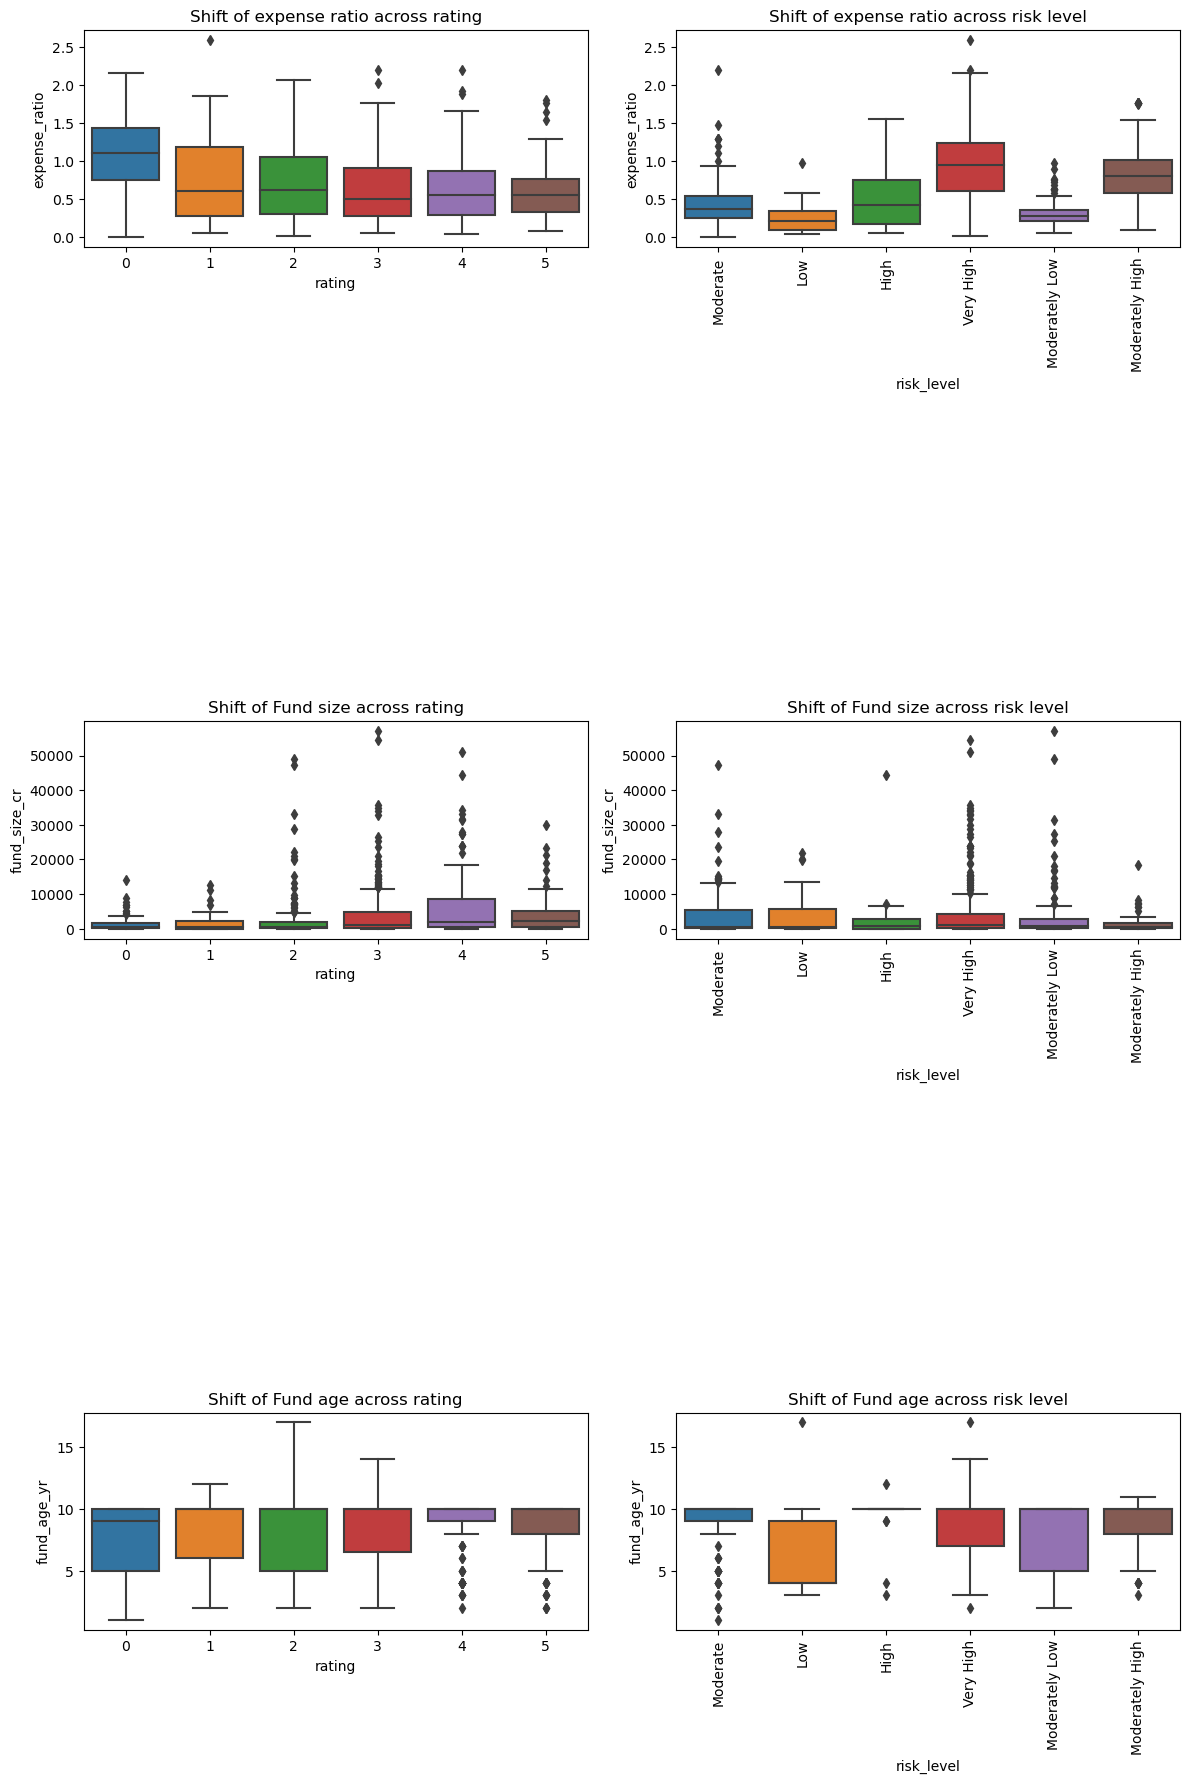

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

sns.boxplot(dataset,x='rating',y='expense_ratio', ax=ax[0,0])
sns.boxplot(dataset,x='rating', y='fund_size_cr', ax=ax[1,0])
sns.boxplot(dataset,x='rating', y='fund_age_yr', ax=ax[2,0])

sns.boxplot(dataset,x='risk_level',y='expense_ratio', ax=ax[0,1])
sns.boxplot(dataset, x='risk_level', y='fund_size_cr', ax=ax[1,1])
sns.boxplot(dataset, x='risk_level', y='fund_age_yr', ax=ax[2,1])

ax[0,0].set_title('Shift of expense ratio across rating')
ax[0,1].set_title('Shift of expense ratio across risk level')
ax[0,1].set_xticklabels(rotation='vertical',labels=dataset['risk_level'].unique())
ax[1,0].set_title('Shift of Fund size across rating')
ax[1,1].set_title('Shift of Fund size across risk level')
ax[1,1].set_xticklabels(rotation='vertical',labels=dataset['risk_level'].unique())
ax[2,0].set_title('Shift of Fund age across rating')
ax[2,1].set_title('Shift of Fund age across risk level')
ax[2,1].set_xticklabels(rotation='vertical',labels=dataset['risk_level'].unique())

plt.tight_layout()
plt.subplots_adjust(bottom=8,top=10)
plt.show()

conclusion 

The higher rating funds is, the lower the expense ratio is.

Most of the Very high risk funds are from Equity and equity fund has high expense ratio.

Most of the funds are invested in risk level High and Very High, People seems to be interested in investing higher rated funds. 

Most of the schemes have risk level Very High by fund age

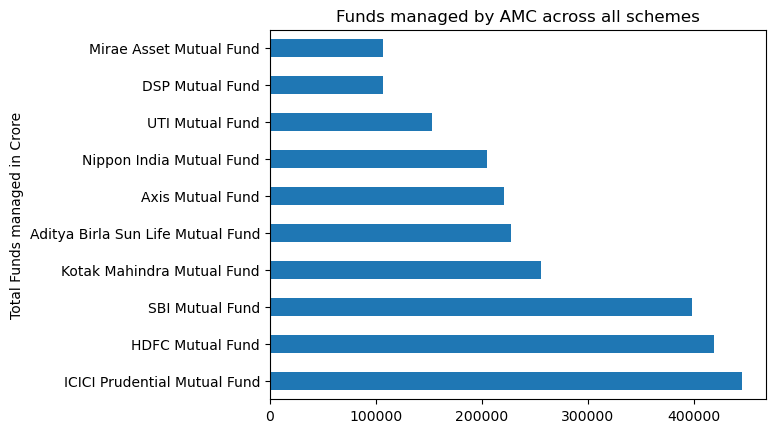

In [37]:
# top 10 AMC by sum of funds managed
dataset.groupby('amc_name')['fund_size_cr'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Total Funds managed in Crore')
plt.title('Funds managed by AMC across all schemes')
plt.show()

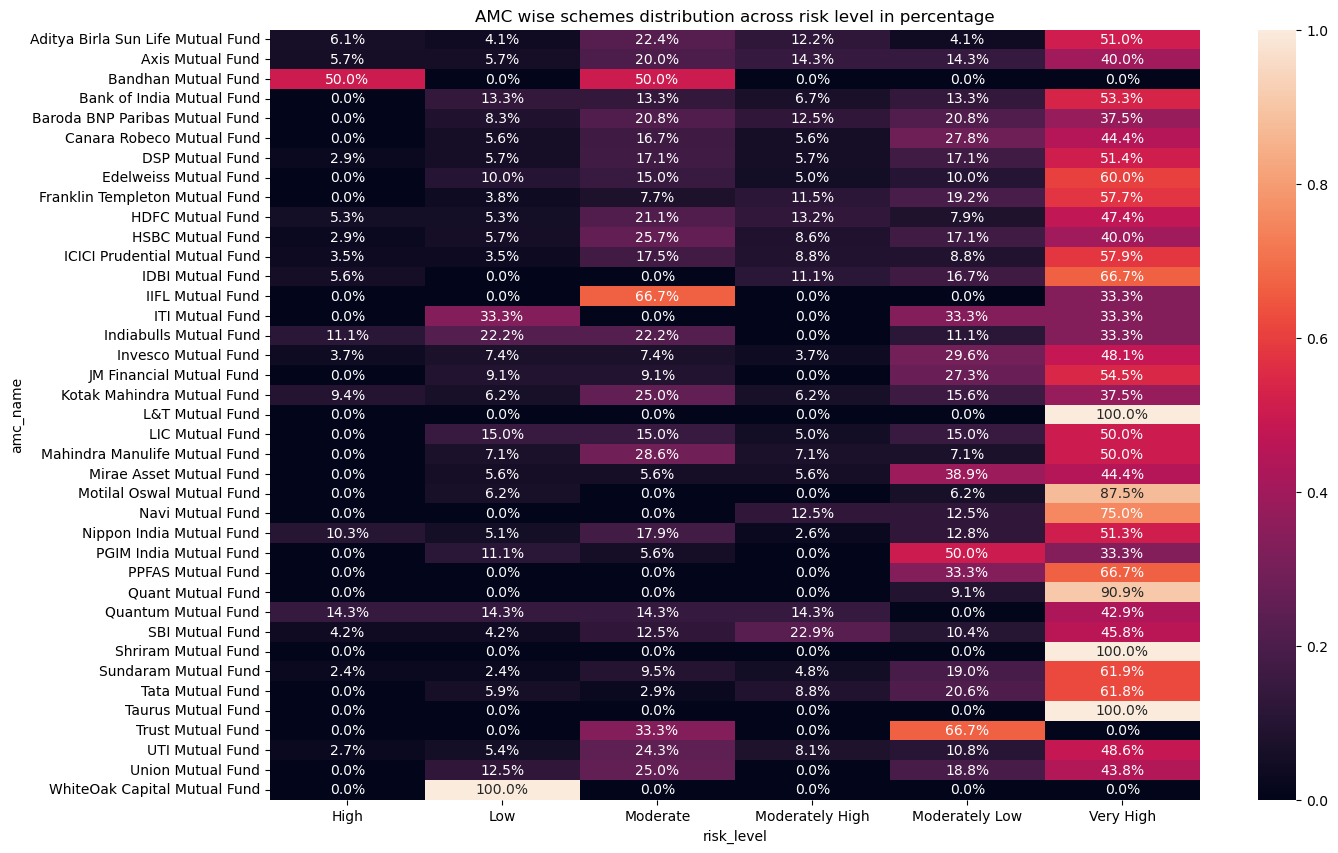

In [38]:
# amc and risk level
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(dataset['amc_name'],dataset['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('AMC wise schemes distribution across risk level in percentage')
plt.show()

Most of the AMCs have schemes with risk level 6(Very High).

Taurus, Shriram and L&T have 100% in Very High Risk category.

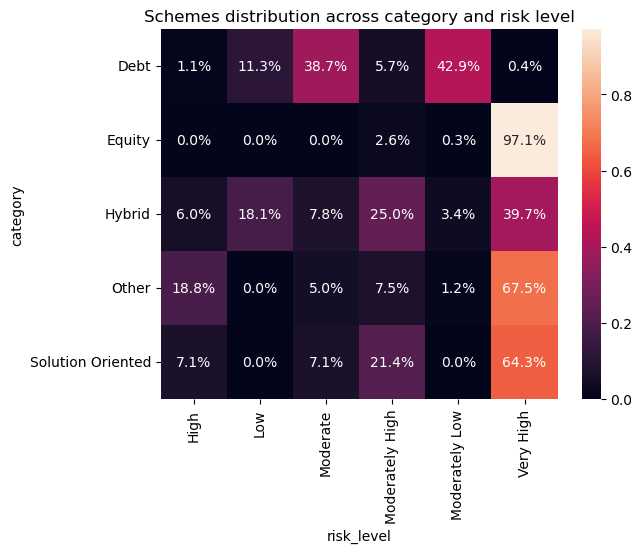

In [39]:
sns.heatmap(pd.crosstab(dataset['category'],dataset['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across category and risk level')
plt.show()

Conclusion

In 3 and 5 years returns have a positive relation with risk level.

It clearly shows that high risk funds should be held for longer time to get more returns.

# Analysis on Alpha, Beta, SD, Sharpe, Sortino

sortino: The Sortino ratio of the fund, which measures the risk-adjusted return of the fund

alpha: The alpha of the fund, which measures the excess return of the fund compared to its benchmark

sd: The standard deviation of the fund's returns

beta: The beta of the fund, which measures the sensitivity of the fund's returns to the market

sharpe: The Sharpe ratio of the fund, which measures the risk-adjusted return of the fund relative to a risk-free asset

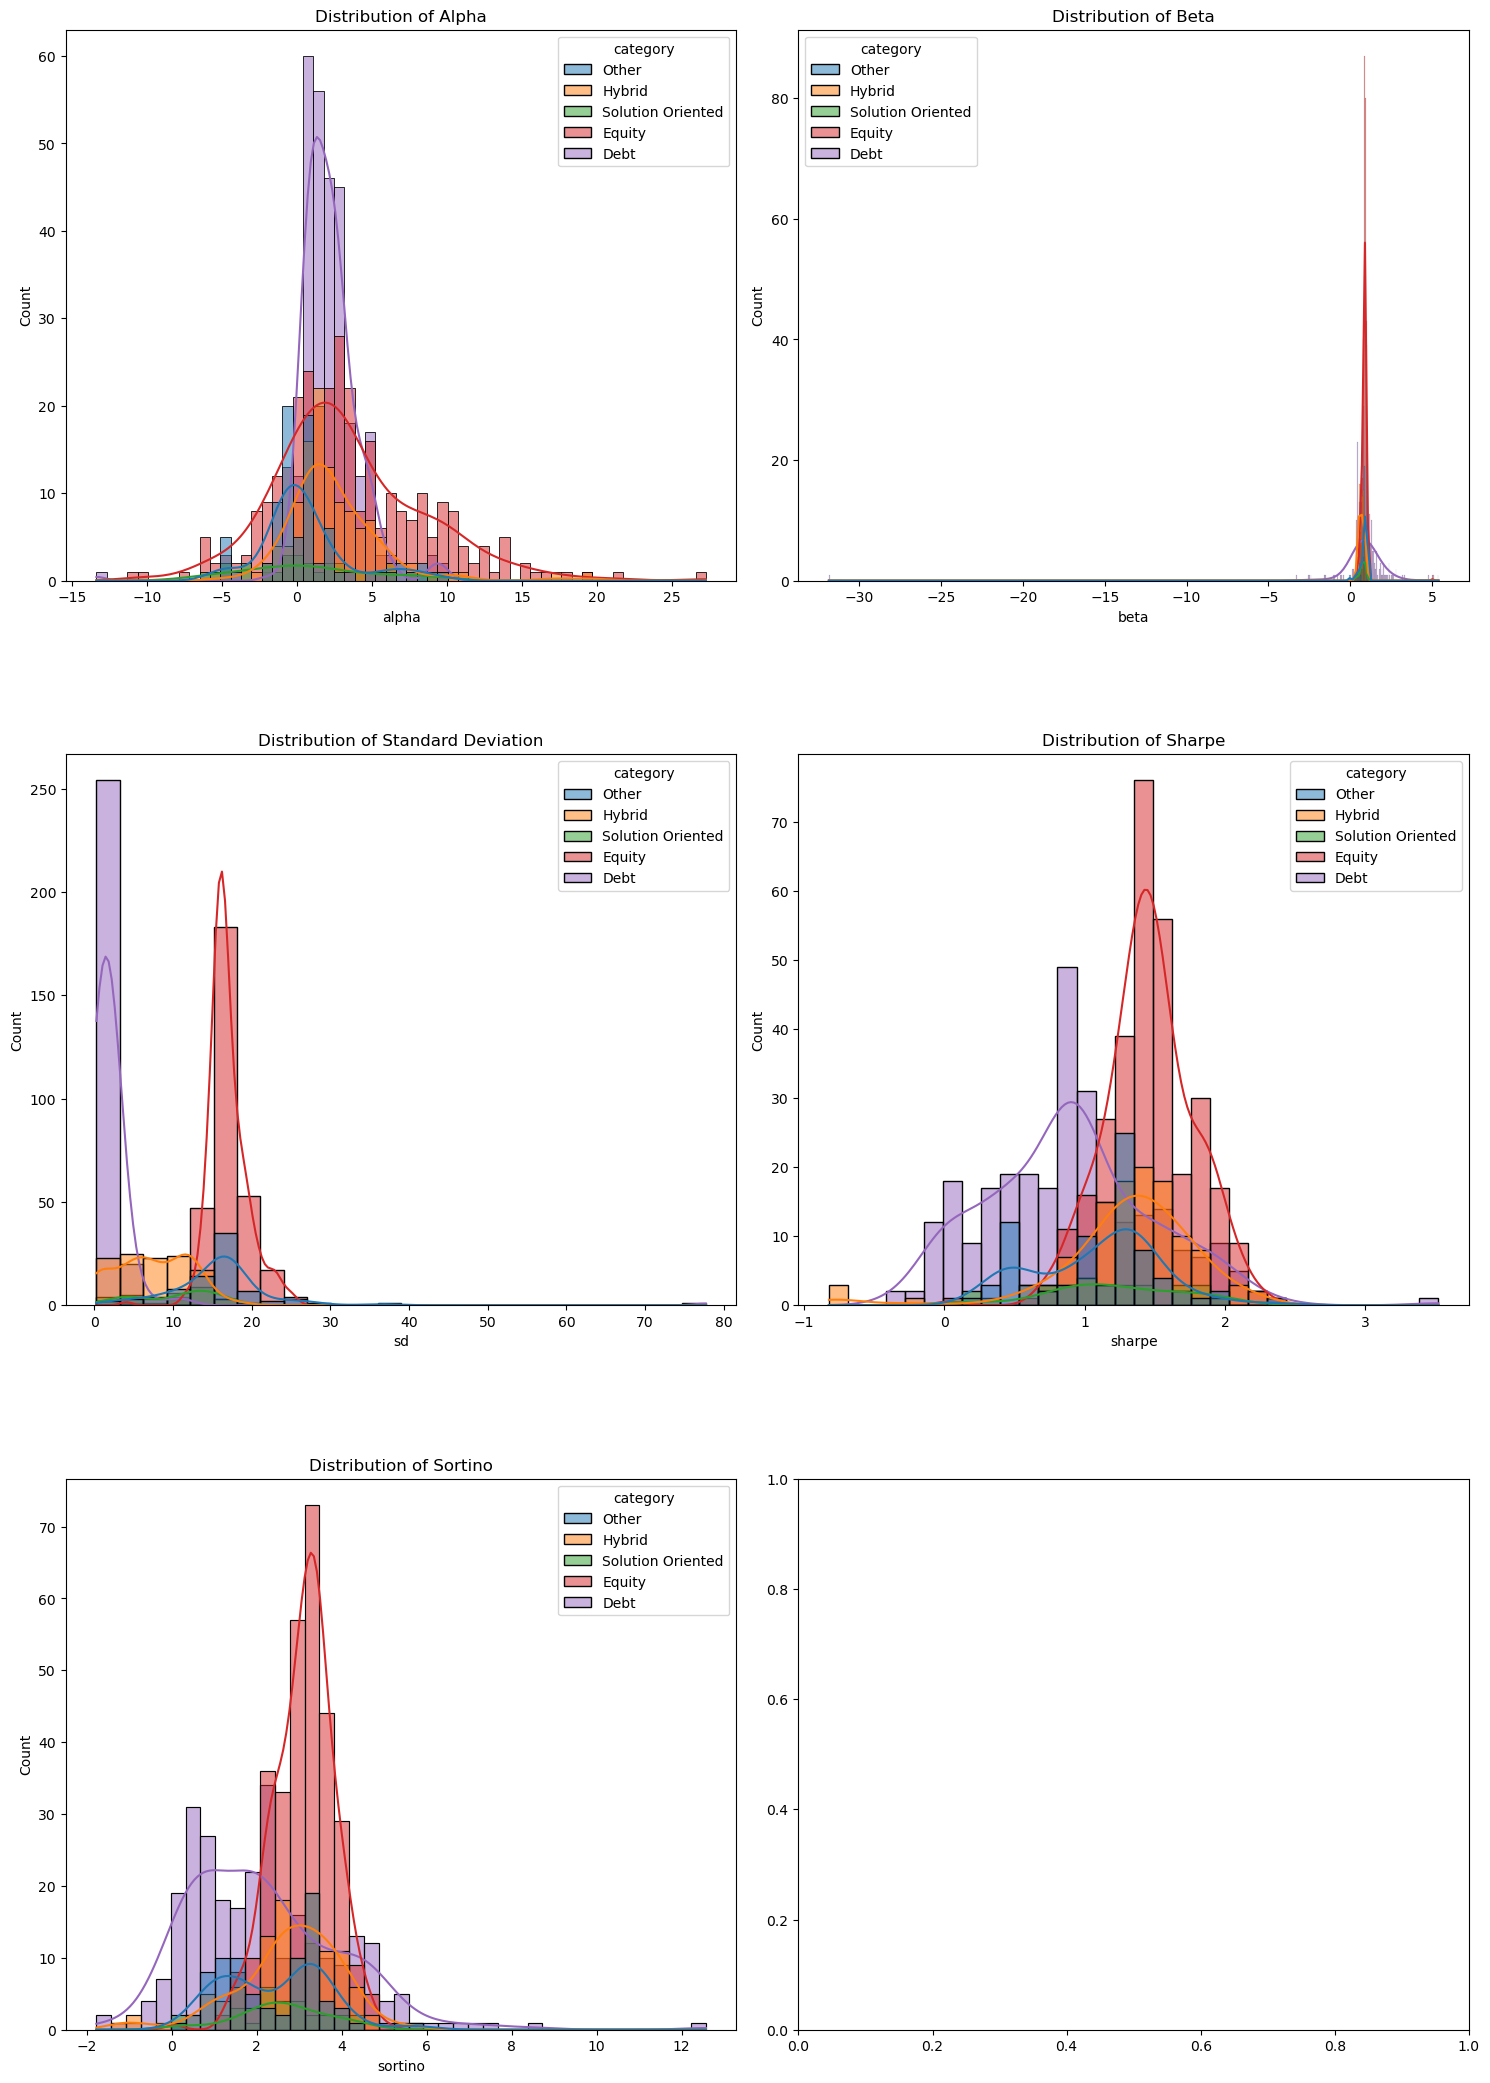

In [40]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))
sns.histplot(dataset, x='alpha', hue='category', ax=ax[0,0], kde=True)
sns.histplot(dataset, x='beta', hue='category', ax=ax[0,1], kde=True)
sns.histplot(dataset, x='sd', hue='category', ax=ax[1,0], kde=True)
sns.histplot(dataset, x='sharpe', hue='category', ax=ax[1,1], kde=True)
sns.histplot(dataset, x='sortino', hue='category', ax=ax[2,0], kde=True)

ax[0,0].set_title('Distribution of Alpha')
ax[0,1].set_title('Distribution of Beta')
ax[1,0].set_title('Distribution of Standard Deviation')
ax[1,1].set_title('Distribution of Sharpe')
ax[2,0].set_title('Distribution of Sortino')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

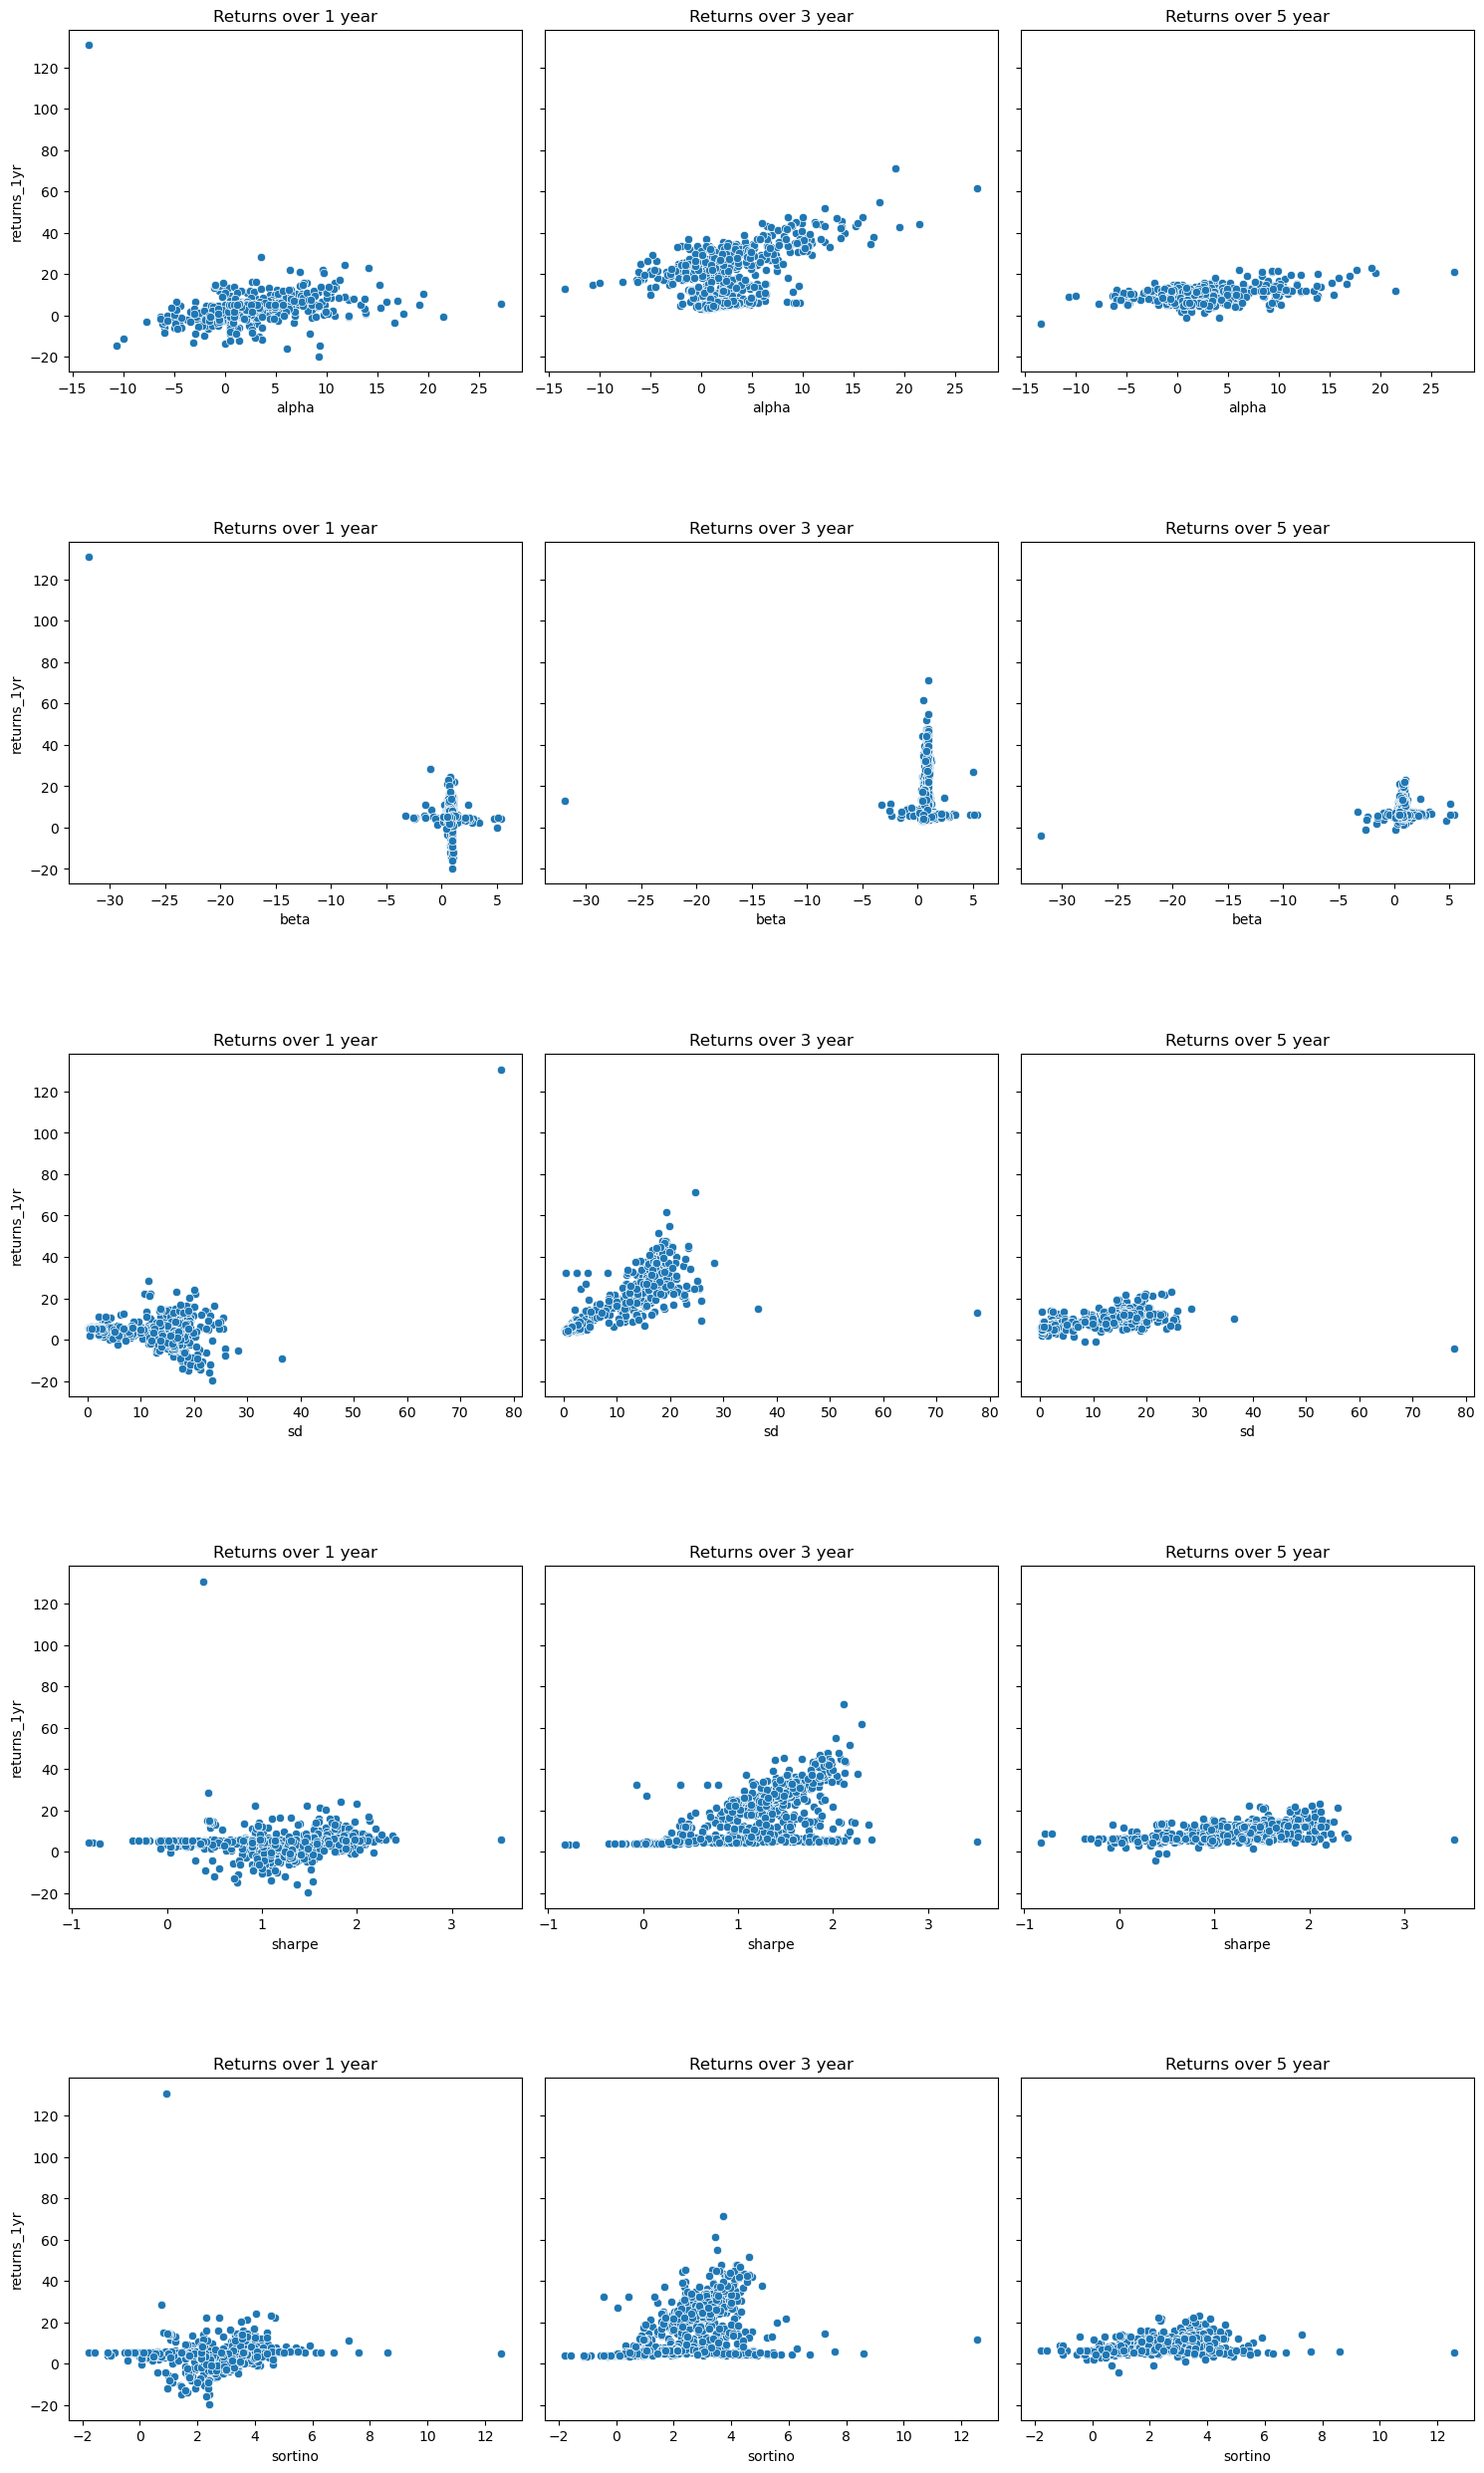

In [41]:
# Create figure and axis objects
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12),sharey='row')

# Create a scatter plot for each axis
sns.scatterplot(dataset,x='alpha',y='returns_1yr',ax=axes[0,0])
sns.scatterplot(dataset,x='alpha',y='returns_3yr',ax=axes[0,1])
sns.scatterplot(dataset,x='alpha',y='returns_5yr',ax=axes[0,2])
sns.scatterplot(dataset,x='beta',y='returns_1yr',ax=axes[1,0])
sns.scatterplot(dataset,x='beta',y='returns_3yr',ax=axes[1,1])
sns.scatterplot(dataset,x='beta',y='returns_5yr',ax=axes[1,2])
sns.scatterplot(dataset,x='sd',y='returns_1yr',ax=axes[2,0])
sns.scatterplot(dataset,x='sd',y='returns_3yr',ax=axes[2,1])
sns.scatterplot(dataset,x='sd',y='returns_5yr',ax=axes[2,2])
sns.scatterplot(dataset,x='sharpe',y='returns_1yr',ax=axes[3,0])
sns.scatterplot(dataset,x='sharpe',y='returns_3yr',ax=axes[3,1])
sns.scatterplot(dataset,x='sharpe',y='returns_5yr',ax=axes[3,2])
sns.scatterplot(dataset,x='sortino',y='returns_1yr',ax=axes[4,0])
sns.scatterplot(dataset,x='sortino',y='returns_3yr',ax=axes[4,1])
sns.scatterplot(dataset,x='sortino',y='returns_5yr',ax=axes[4,2])

# Set the title for each axis
axes[0,0].set_title('Returns over 1 year')
axes[0,1].set_title('Returns over 3 year')
axes[0,2].set_title('Returns over 5 year')
axes[1,0].set_title('Returns over 1 year')
axes[1,1].set_title('Returns over 3 year')
axes[1,2].set_title('Returns over 5 year')
axes[2,0].set_title('Returns over 1 year')
axes[2,1].set_title('Returns over 3 year')
axes[2,2].set_title('Returns over 5 year')
axes[3,0].set_title('Returns over 1 year')
axes[3,1].set_title('Returns over 3 year')
axes[3,2].set_title('Returns over 5 year')
axes[4,0].set_title('Returns over 1 year')
axes[4,1].set_title('Returns over 3 year')
axes[4,2].set_title('Returns over 5 year')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

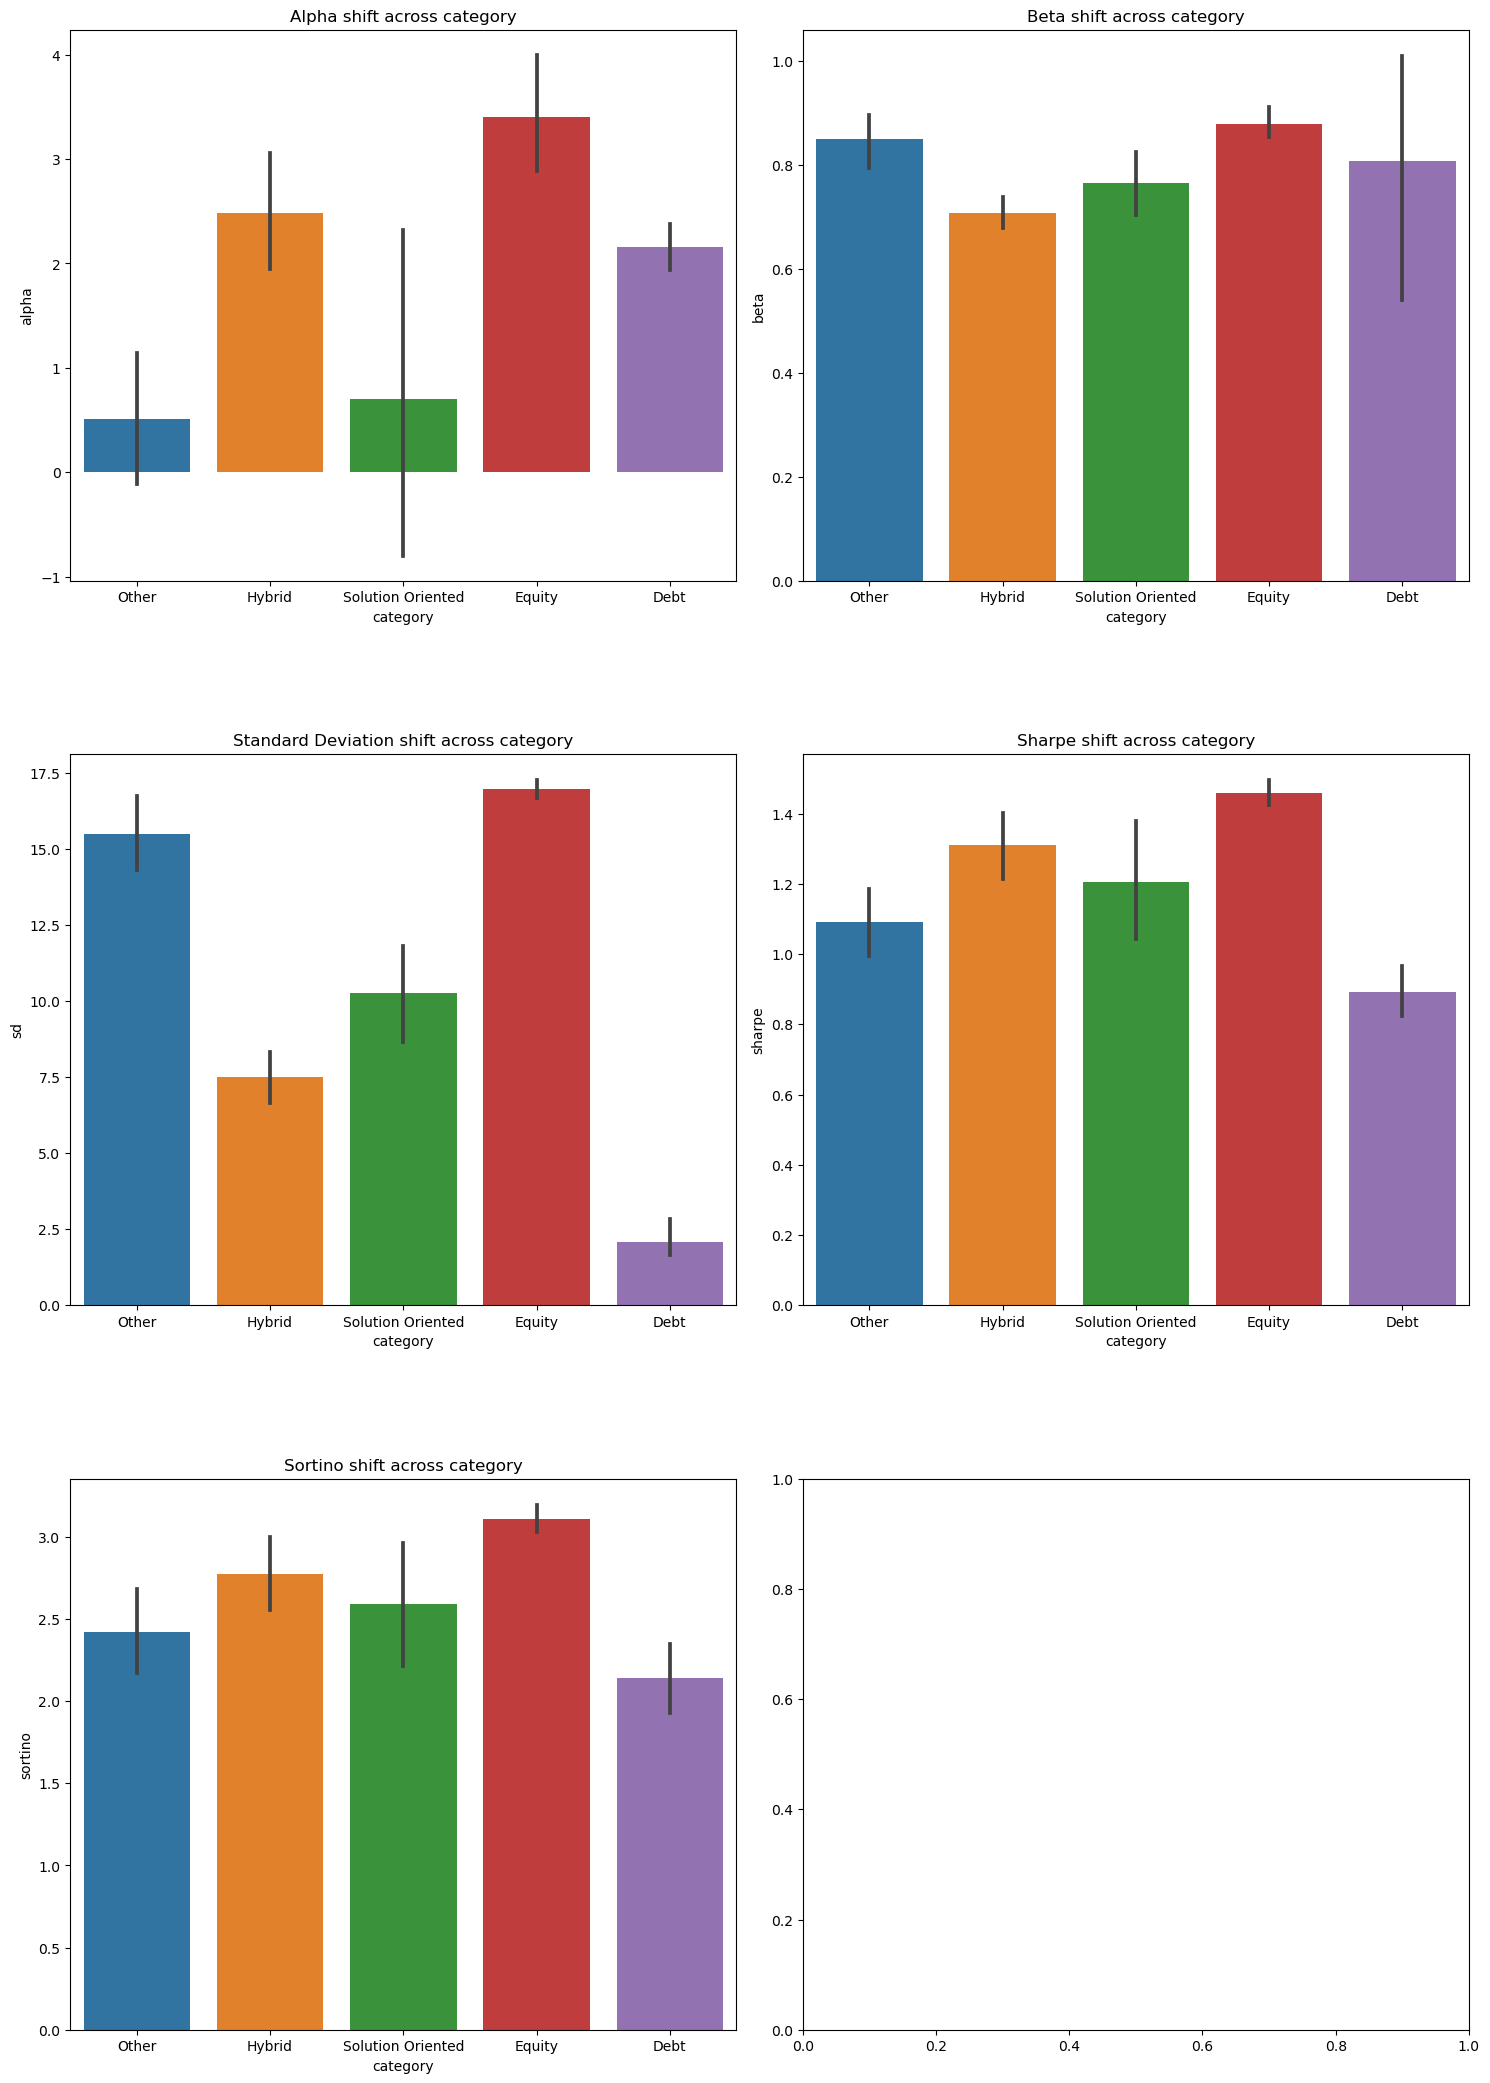

In [42]:
#rating vs Alpha, Beta, SD, Sharpe, Sortino
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.barplot(dataset,x='category',y='alpha', ax=ax[0,0])
sns.barplot(dataset,x='category',y='beta', ax=ax[0,1])
sns.barplot(dataset,x='category',y='sd', ax=ax[1,0])
sns.barplot(dataset,x='category',y='sharpe', ax=ax[1,1])
sns.barplot(dataset,x='category',y='sortino', ax=ax[2,0])

ax[0,0].set_title('Alpha shift across category')
ax[0,1].set_title('Beta shift across category')
ax[1,0].set_title('Standard Deviation shift across category')
ax[1,1].set_title('Sharpe shift across category')
ax[2,0].set_title('Sortino shift across category')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

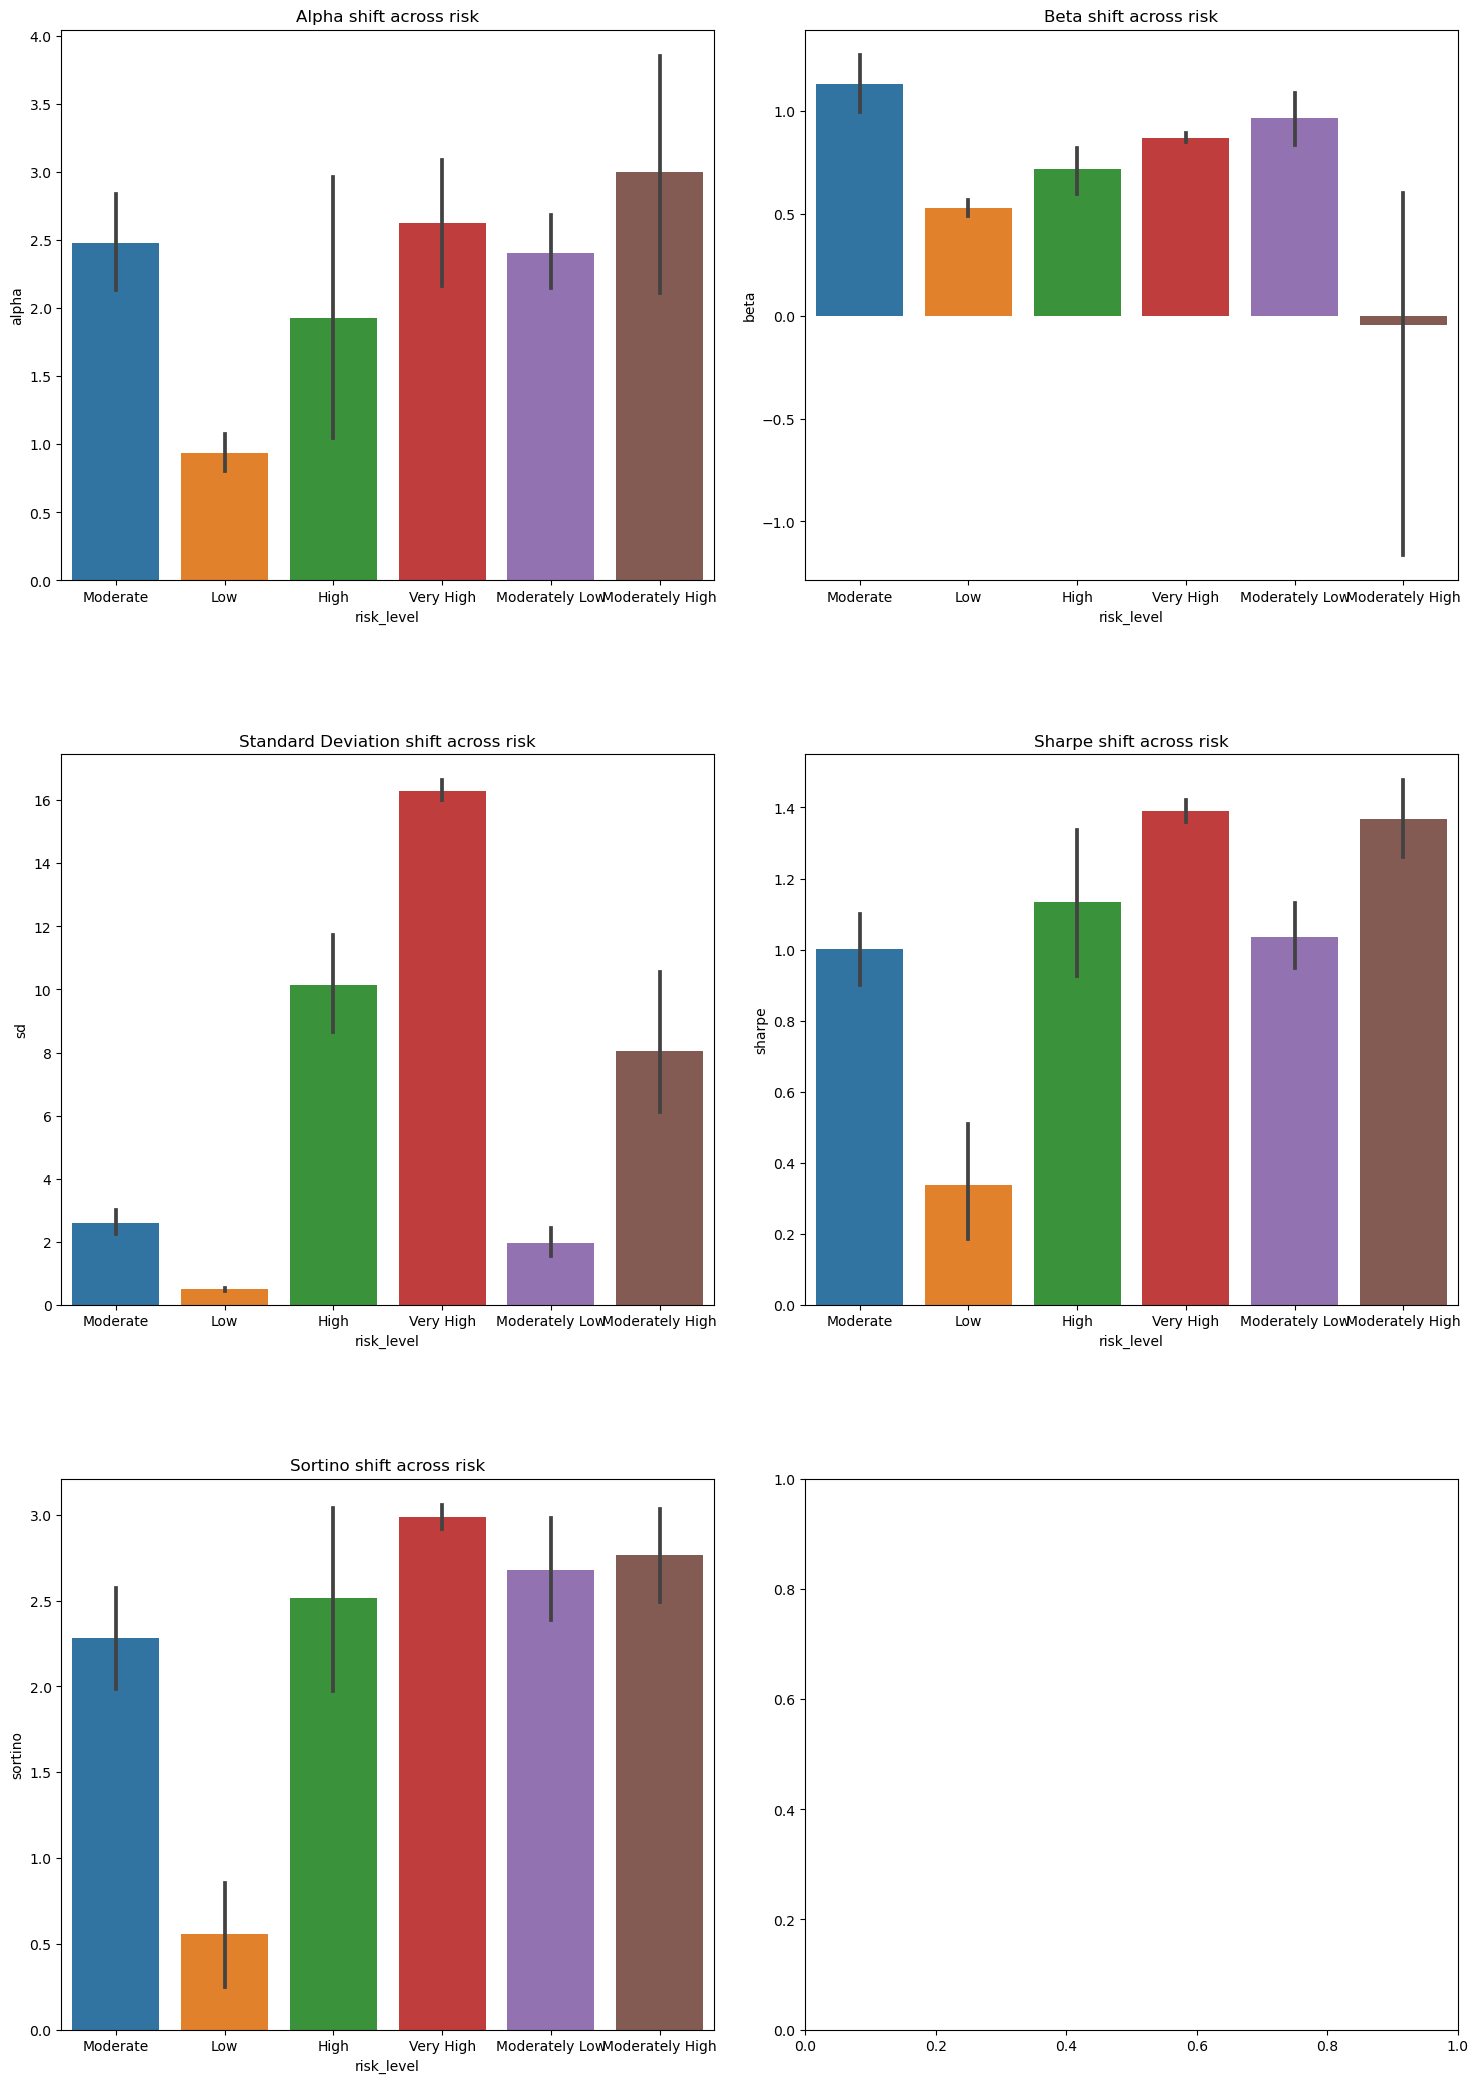

In [43]:
#Risk vs Alpha, Beta, SD, Sharpe, Sortino
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.barplot(dataset,x='risk_level',y='alpha', ax=ax[0,0])
sns.barplot(dataset,x='risk_level',y='beta', ax=ax[0,1])
sns.barplot(dataset,x='risk_level',y='sd', ax=ax[1,0])
sns.barplot(dataset,x='risk_level',y='sharpe', ax=ax[1,1])
sns.barplot(dataset,x='risk_level',y='sortino', ax=ax[2,0])

ax[0,0].set_title('Alpha shift across risk')
ax[0,1].set_title('Beta shift across risk')
ax[1,0].set_title('Standard Deviation shift across risk')
ax[1,1].set_title('Sharpe shift across risk')
ax[2,0].set_title('Sortino shift across risk')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

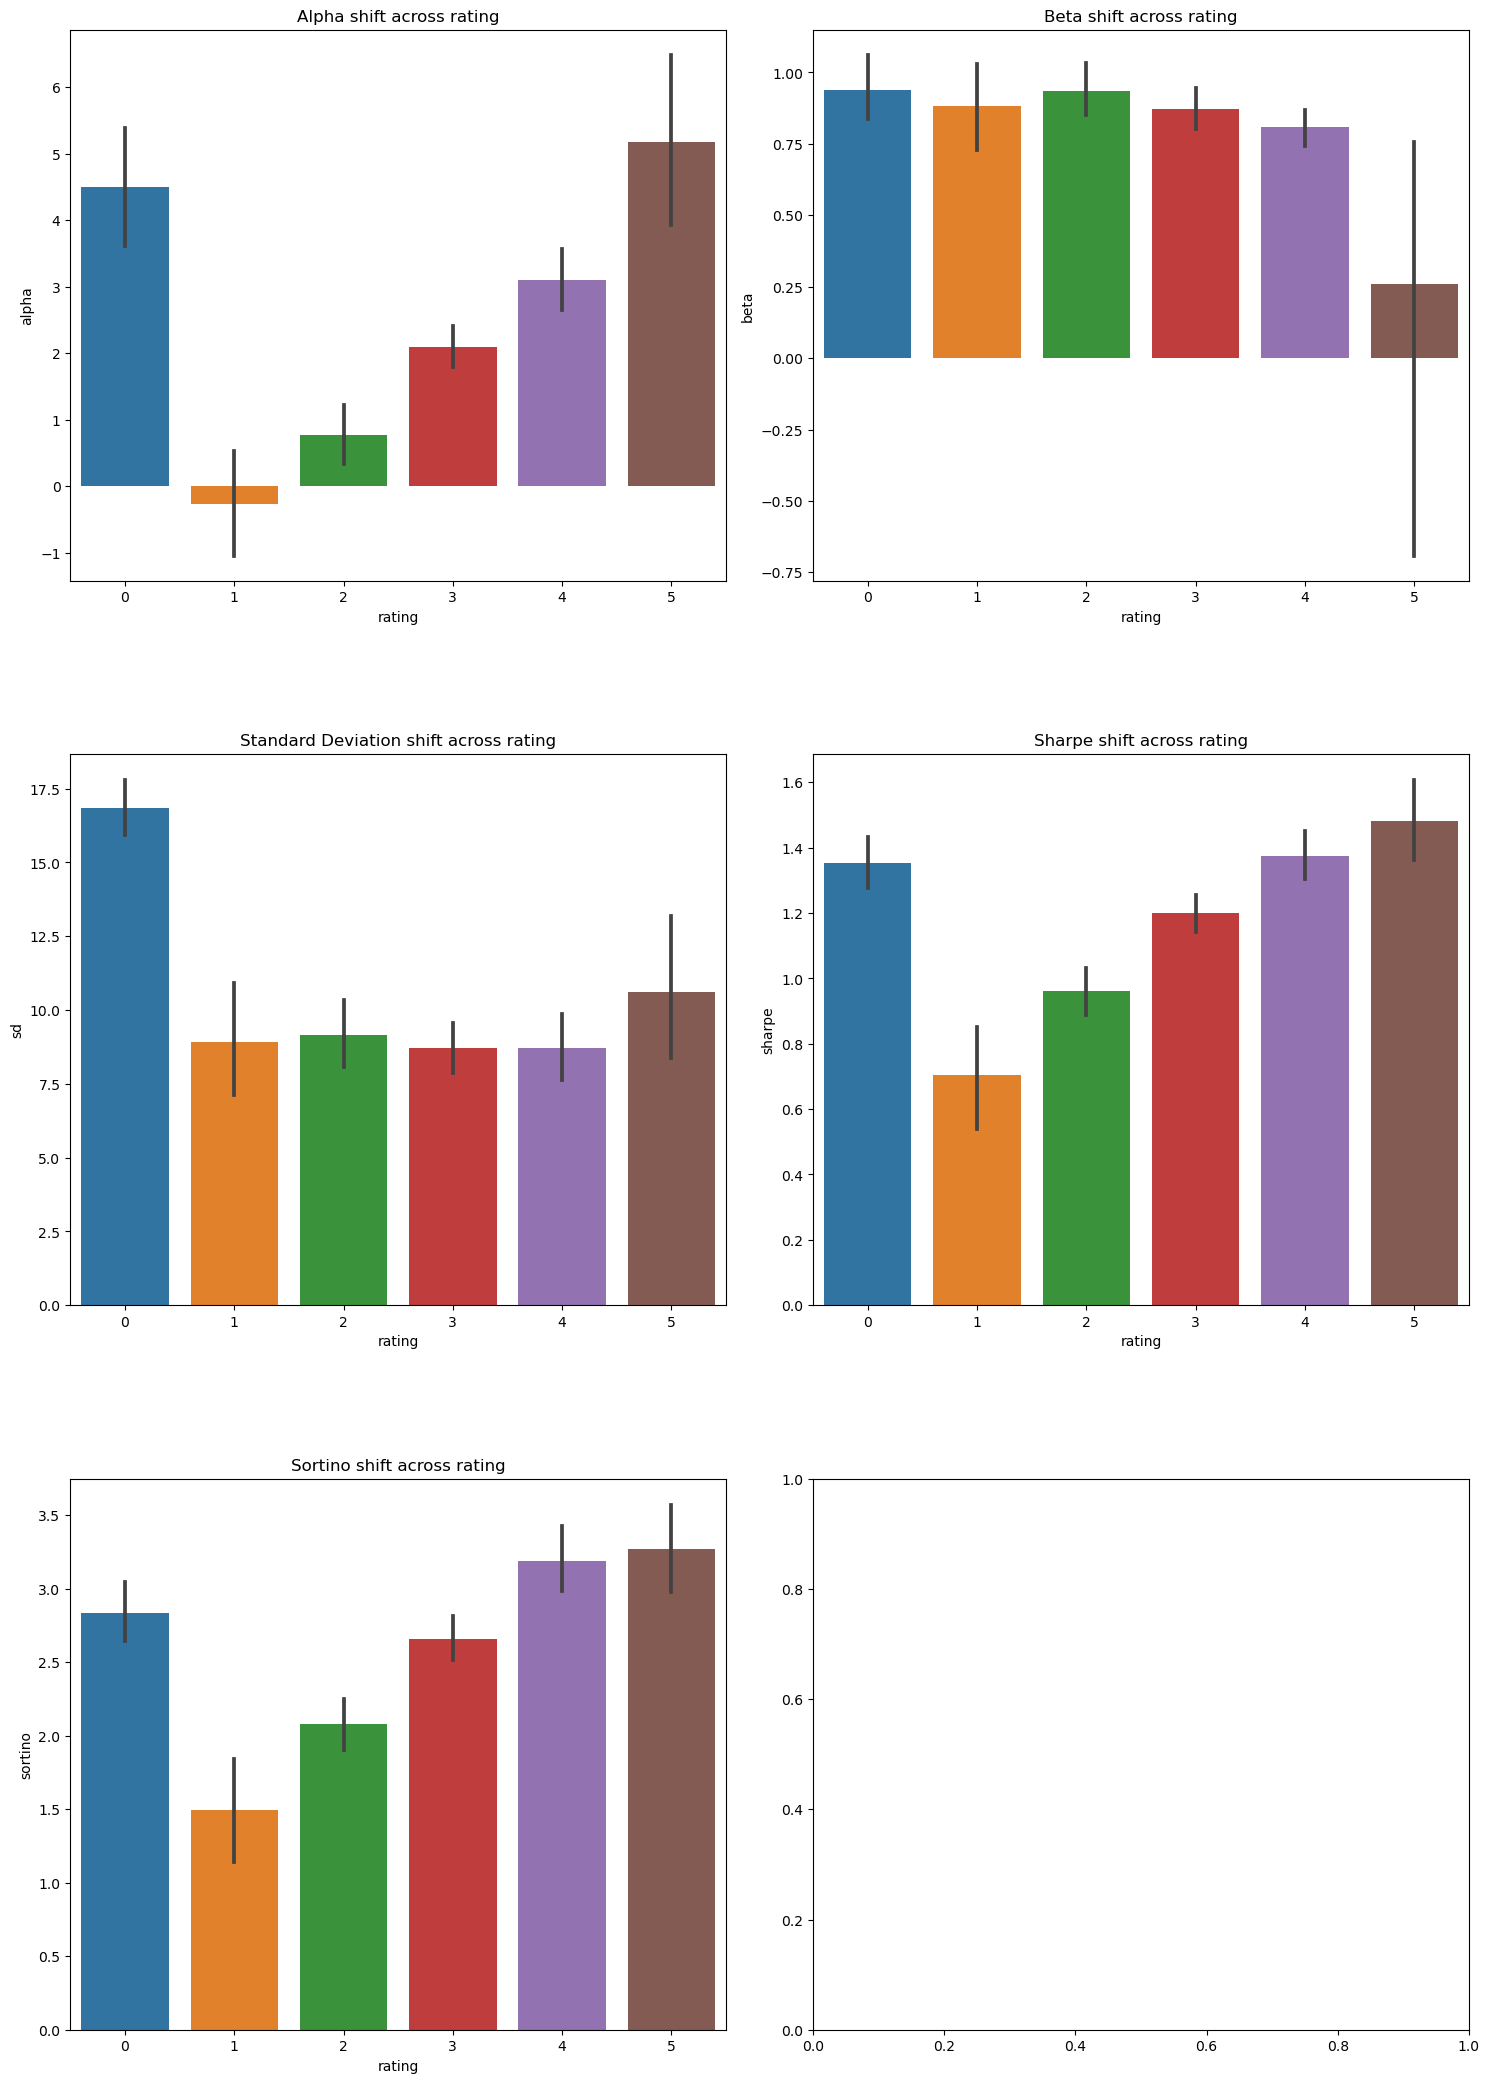

In [44]:
#category vs Alpha, Beta, SD, Sharpe, Sortino
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.barplot(dataset,x='rating',y='alpha', ax=ax[0,0])
sns.barplot(dataset,x='rating',y='beta', ax=ax[0,1])
sns.barplot(dataset,x='rating',y='sd', ax=ax[1,0])
sns.barplot(dataset,x='rating',y='sharpe', ax=ax[1,1])
sns.barplot(dataset,x='rating',y='sortino', ax=ax[2,0])

ax[0,0].set_title('Alpha shift across rating')
ax[0,1].set_title('Beta shift across rating')
ax[1,0].set_title('Standard Deviation shift across rating')
ax[1,1].set_title('Sharpe shift across rating')
ax[2,0].set_title('Sortino shift across rating')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


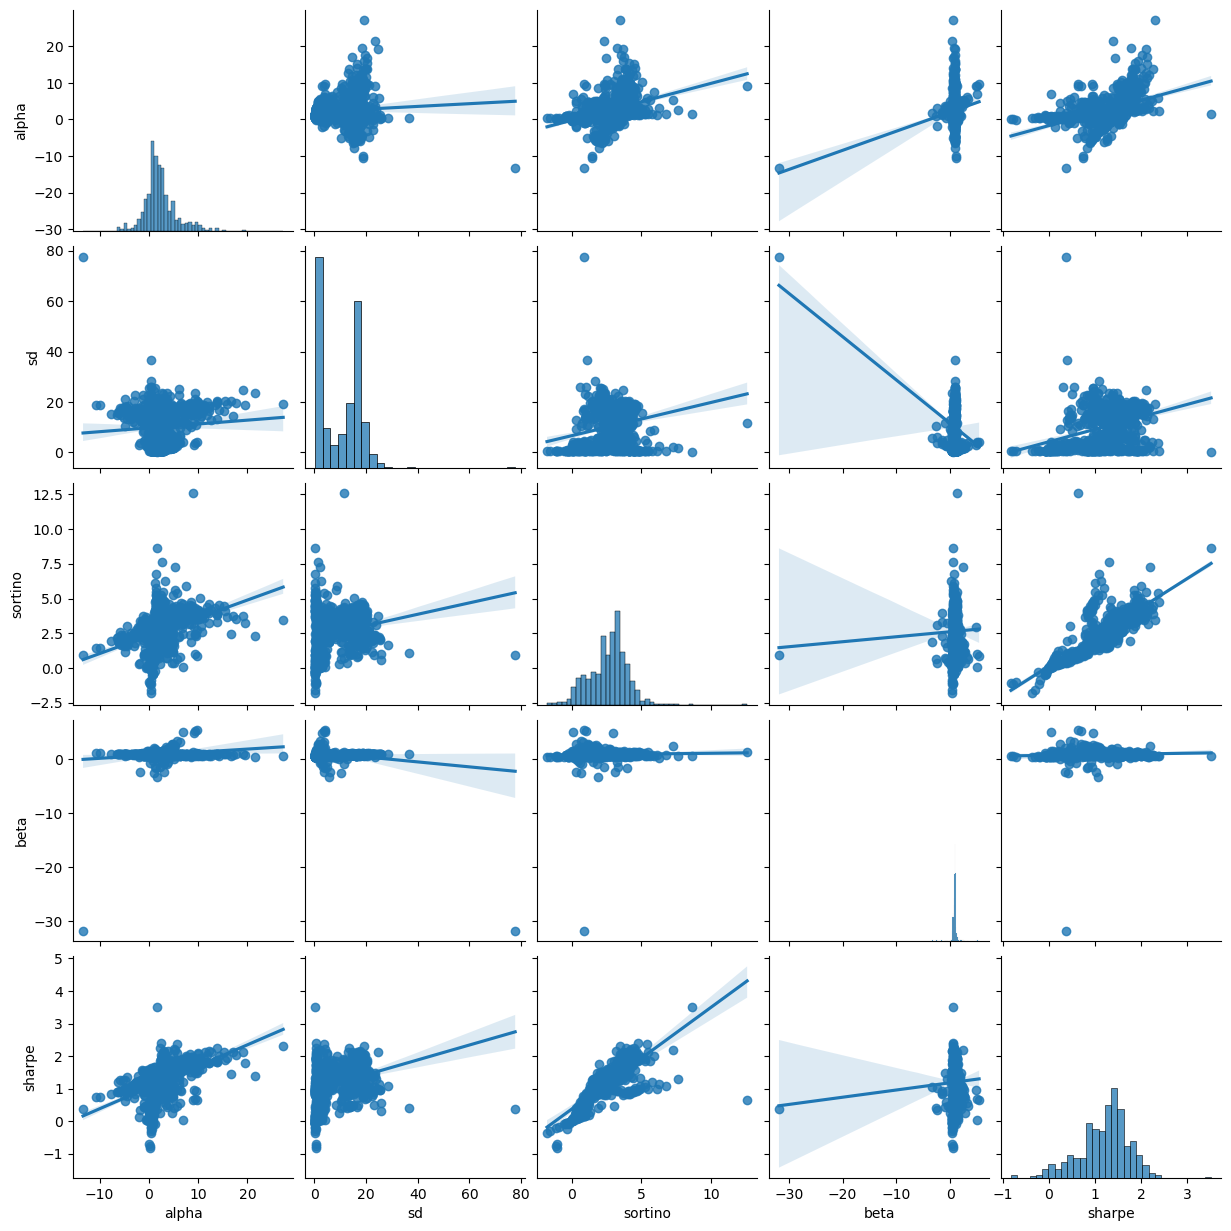

In [45]:
sns.pairplot(dataset,vars=['alpha','sd','sortino','beta','sharpe'],kind='reg')

conclusion

Sharpe and Alpha are positively correlated.

Sortino and Sharpe are positively correlated.

Sortino and Alpha are positively correlated.

In [46]:
dataset['risk_level'].replace({'Low':1, 'Moderately Low':2, 'Moderate':3, 'Moderately High':4, 'High':5, 'Very High':6},inplace=True)
dataset

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.900000
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.700000
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.747059
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.200000
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.90,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.200000
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,6.385446
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.300000


# Importing Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Regularization

In [48]:
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level']]
y = dataset["category"]

In [49]:
model = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [52]:
model.score(X_test, y_test)

0.803680981595092

In [53]:
y_pred = model.predict(X_test)

In [54]:
df= confusion_matrix(y_test, y_pred)

In [55]:
df

array([[48,  0,  2,  0,  0],
       [ 0, 58,  2,  4,  0],
       [ 5,  2, 16,  0,  0],
       [ 1,  5,  4,  9,  0],
       [ 0,  5,  2,  0,  0]])

Text(50.722222222222214, 0.5, 'actual')

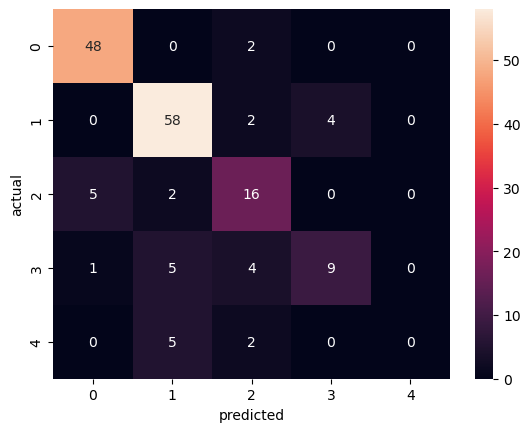

In [56]:
sns.heatmap(df, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [57]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

             Debt       0.89      0.96      0.92        50
           Equity       0.83      0.91      0.87        64
           Hybrid       0.62      0.70      0.65        23
            Other       0.69      0.47      0.56        19
Solution Oriented       0.00      0.00      0.00         7

         accuracy                           0.80       163
        macro avg       0.61      0.61      0.60       163
     weighted avg       0.77      0.80      0.78       163



/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Key Features

sortino: The Sortino ratio of the fund, which measures the risk-adjusted return of the fund

alpha: The alpha of the fund, which measures the excess return of the fund compared to its benchmark

sd: The standard deviation of the fund's returns

beta: The beta of the fund, which measures the sensitivity of the fund's returns to the market

sharpe: The Sharpe ratio of the fund, which measures the risk-adjusted return of the fund relative to a risk-free asset

# MinMaxScaler

In [58]:
# Assuming 'dataset' is your DataFrame containing numerical features
numerical_features = ['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'expense_ratio', 'fund_size_cr']

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical features
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
dataset_1 = pd.DataFrame(dataset, columns=numerical_features)
dataset_1

,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,expense_ratio,fund_size_cr
0,0.5625,0.145746,0.384236,0.117753,0.855341,0.244240,0.4,0.104247,0.000134
1,0.5625,0.216179,0.366749,0.005810,0.870102,0.442396,0.0,0.138996,0.075121
2,0.5625,0.363319,0.394828,0.133118,0.873054,0.516129,0.8,0.204633,0.002710
3,0.1875,0.275453,0.172167,0.190058,0.877885,0.396313,1.0,0.293436,0.011124
4,0.5625,0.380753,0.378079,0.130536,0.873323,0.509217,1.0,0.235521,0.111896
...,...,...,...,...,...,...,...,...,...
809,0.5625,0.295676,0.351724,0.087669,0.866881,0.486175,0.6,0.370656,0.088793
810,0.5625,0.347280,0.396305,0.198192,0.879227,0.529954,1.0,0.447876,0.118101
811,0.1875,0.094142,0.351970,0.001549,0.874396,0.172811,0.0,0.100386,0.003411
812,0.1875,0.094142,0.351970,0.001549,0.874396,0.172811,0.0,0.084942,0.000204


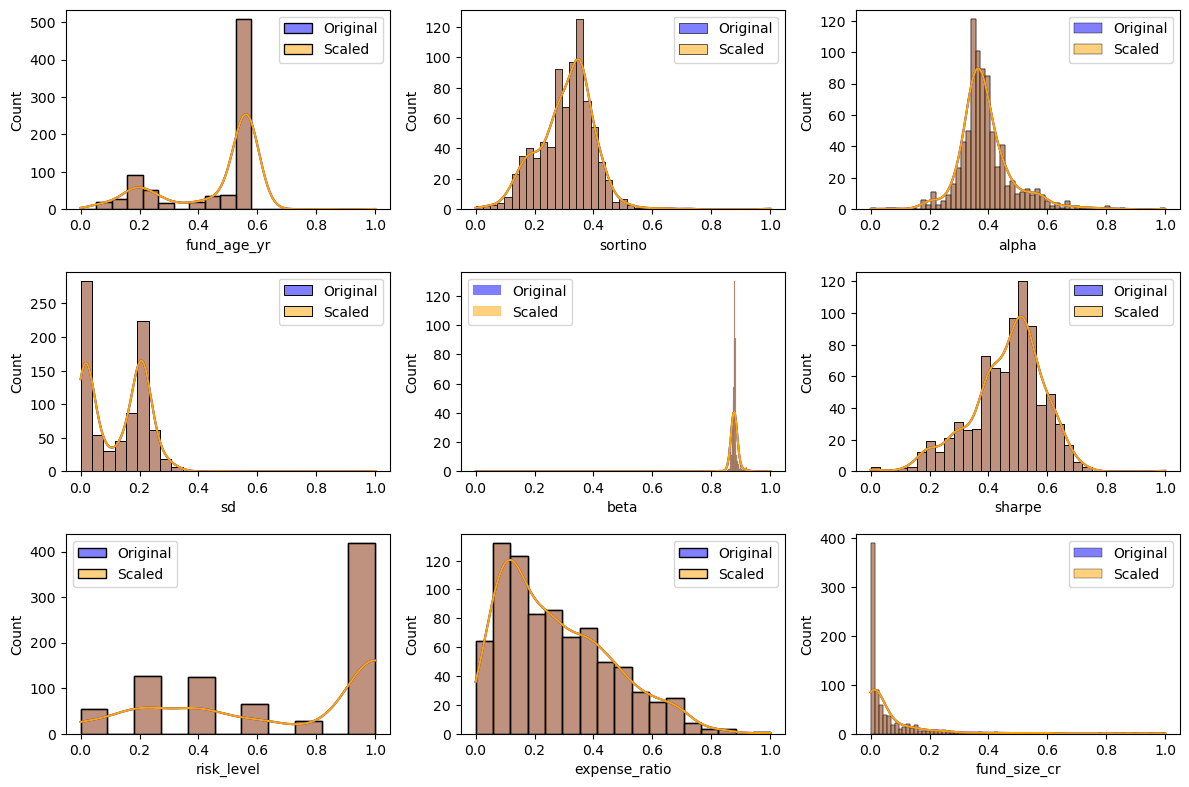

In [59]:
# Plot histograms of original and scaled features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(dataset[feature], kde=True, color='blue', label='Original', alpha=0.5)
    sns.histplot(dataset_1[feature], kde=True, color='orange', label='Scaled', alpha=0.5)
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

# Lasso Regression

In [63]:

X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level', 'expense_ratio', 'fund_size_cr']]
# Assuming interested in predicting returns_1yr
y = dataset["returns_5yr"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Lasso regression model
alpha = 1.0  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model
train_predictions = lasso_model.predict(X_train_scaled)
test_predictions = lasso_model.predict(X_test_scaled)
from sklearn.metrics import r2_score
train_score = r2_score(y_train, lasso_model.predict(X_train_scaled))
test_score = r2_score(y_test, lasso_model.predict(X_test_scaled))


print("Training R-squared:", train_score)
print("Testing R-squared:", test_score)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training R-squared: 0.3997715855194851
Testing R-squared: 0.3511886157269275
Training MSE: 7.221101563276238
Testing MSE: 8.35038689021061


# Ridge

In [64]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Select relevant features (X) and target variable (Y)
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level', 'expense_ratio', 'fund_size_cr']]
# Assuming interested in predicting returns_1yr
y = dataset["returns_5yr"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and train Ridge regression model with regularization parameter (alpha)
alpha = 0.1  # Regularization parameter
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Evaluate model performance
train_score = ridge_model.score(X_train_scaled, y_train)
test_score = ridge_model.score(X_test_scaled, y_test)

print("Training R-squared:", train_score)
print("Testing R-squared:", test_score)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training R-squared: 0.6333665970337234
Testing R-squared: 0.6079622458611129
Training MSE: 7.221101563276238
Testing MSE: 8.35038689021061


In [65]:
train_predictions = ridge_model.predict(X_train_scaled)
test_predictions = ridge_model.predict(X_test_scaled)
print("Train Prediction:", train_predictions)
print("Test Prediction:", test_predictions)

Train Prediction: [11.67433556  6.29262077  5.44320353  6.43387384 11.20280597 13.58032008
  7.7263924   9.5243127   6.59070191 11.48259823  7.25950158 10.65362031
  9.78465708 11.76825649 12.2656211   6.77981517  5.31979578  7.50897611
  8.75662627 13.4718613  13.91532897 10.76669362 11.95256156 11.32157106
 15.28200366  5.73839522 10.22023581  5.96006387 11.22266228 14.09014366
  7.62301178  6.2906865   4.64964324  7.02521508  9.73367726 11.11530209
 12.06499425  9.95673952 12.28084281 10.57671404  8.67407026 12.07990586
 14.87544621 12.84279576  9.82807334 11.56207589 11.9995618   6.21261744
 11.04553237 11.15969083  8.78013791  8.65258298 13.27711211  6.20643909
  9.85709829 11.63882762 12.87642775 11.85930188  6.91192822  6.57265035
  7.98478725 13.71143388  7.00690205  6.46314804  7.40899342  7.00509461
  6.55303105 10.76423762  8.37499091  4.45308574 10.89294328 10.68769322
  5.37973508 10.35822558  5.24923019  5.50037815  7.77175198 11.71309559
 13.27869098 11.47820984  8.38402

# plotting Lasso and Ridge

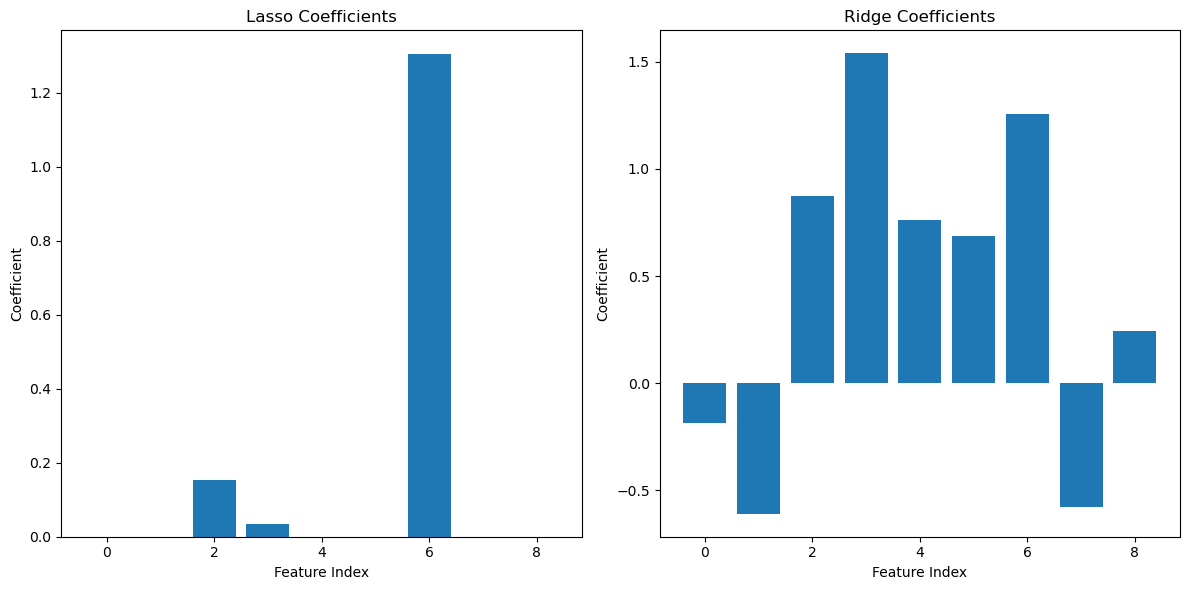

In [66]:
# Get the coefficients of Lasso and Ridge models
lasso_coefficients = lasso_model.coef_
ridge_coefficients = ridge_model.coef_

# Plot the coefficients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Lasso Coefficients')

plt.subplot(1, 2, 2)
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients')

plt.tight_layout()
plt.show()

# Linear Regression Model

In [67]:
# Select relevant features (X) and target variable (Y)
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level', 'expense_ratio', 'fund_size_cr']]
# Assuming interested in predicting returns_1yr
y = dataset["returns_5yr"]

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/5f/trkq0wn95wj7f6lh90n_v3gr0000gn/T/ipykernel_14762/1975357473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(y_train))
/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Skewness: 0.25')

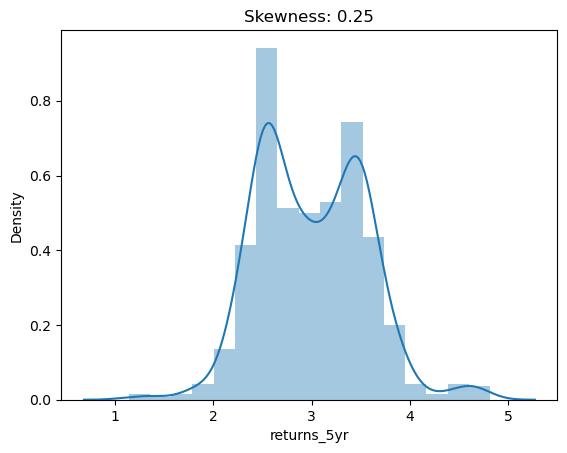

In [69]:
sns.distplot(np.sqrt(y_train))
plt.title(f'Skewness: {np.round(np.sqrt(y_train).skew(),2)}')

In [70]:
X_train.shape

(651, 9)

In [71]:
X_test.shape

(163, 9)

In [72]:
# Model building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
#model predictions
prediction = model.predict(X_test)
prediction


array([ 7.50982568, 10.20192827, 11.63328902, 11.59711265,  7.3394778 ,
        7.86223344,  9.97734309, 13.87586648,  7.20767253, 11.76184344,
       12.20858626, 11.44352568,  7.14735334,  7.15394758,  7.47680109,
       13.98446225, 11.96489034,  5.64574146, 10.90265676,  5.07034364,
        8.00592912,  7.82255795,  4.25840652, 10.41152811,  9.61015539,
        7.25329032, 12.99043444, 10.52267918,  6.71587608, 10.0720895 ,
       10.66504388, 13.49364204, 15.88304711,  6.82018277,  9.60213265,
        6.72063433, 11.60268431,  9.98258897,  5.76155797,  9.66588187,
       12.60962696,  9.96602234, 11.60624426,  9.28810403,  8.0315272 ,
       11.50734715, 11.64492054,  6.97941638,  9.2191639 , 11.64006107,
        8.73819238,  5.1843952 ,  4.98955764, 12.77471045,  5.1848416 ,
       12.69916124, 11.86670849, 10.32916781, 12.50367529,  7.81277964,
        8.04001183,  6.30270999, 14.79951592, 13.95185804, 10.46344307,
        6.90574901,  6.80869685, 12.92466603,  7.22587763, 11.56

In [74]:
len(prediction)

163

In [75]:
# Model interpretation
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

         Feature  Coefficient
0    fund_age_yr    -1.547545
1        sortino    -6.290201
2          alpha     9.933677
3             sd    15.320234
4           beta    20.483165
5         sharpe     5.401882
6     risk_level     3.287880
7  expense_ratio    -3.172455
8   fund_size_cr     1.948841


In [76]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Model evaluation
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

#Result of the model, how the data are related for test model
accuracy = model.score(X_test, y_test)

#Result of the model, how the data are related
accuracy_1 = model.score(X_train, y_train)

print("Mean Squared Error:", mse)
print("R-squared:",r_squared)
print("mae:", mae)
print("test_model:", accuracy)
print("train_model:",accuracy_1)


Mean Squared Error: 4.622425928900649
R-squared: 0.61775520682952
mae: 1.593346114531743
test_model: 0.61775520682952
train_model: 0.6289244348376415


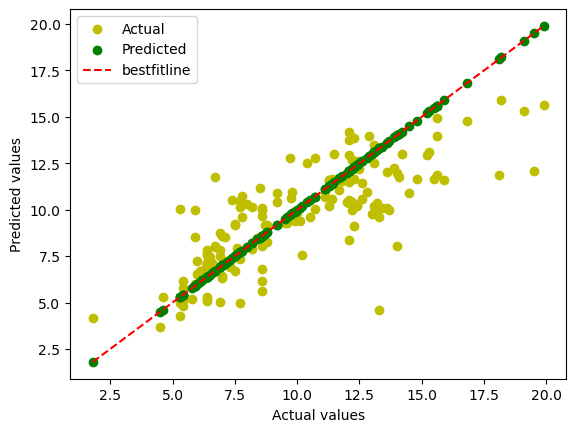

In [77]:
#Bestfit line
plt.scatter(y_test, prediction, c='y', label='Actual')
plt.scatter(y_test, y_test, c='g', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='bestfitline')
plt.legend()

# Logistic Regression 

In [78]:
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level']]
# Assuming interested in predicting returns_1yr
y = dataset["category"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # You may need to adjust max_iter depending on convergence
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
train_predictions = logistic_model.predict(X_train_scaled)
test_predictions = logistic_model.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification report and confusion matrix for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))

Training Accuracy: 0.7972350230414746
Testing Accuracy: 0.7730061349693251

Classification Report:
                   precision    recall  f1-score   support

             Debt       0.83      1.00      0.91        50
           Equity       0.77      0.95      0.85        64
           Hybrid       0.62      0.43      0.51        23
            Other       0.57      0.21      0.31        19
Solution Oriented       1.00      0.14      0.25         7

         accuracy                           0.77       163
        macro avg       0.76      0.55      0.57       163
     weighted avg       0.76      0.77      0.73       163


Confusion Matrix:
[[50  0  0  0  0]
 [ 0 61  1  2  0]
 [ 8  5 10  0  0]
 [ 2 10  3  4  0]
 [ 0  3  2  1  1]]


Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as:

Precision
=
True Positives
True Positives
+
False Positives
Precision= 
True Positives+False Positives
True Positives
​
 
Recall (also called Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It is calculated as:

Recall
=
True Positives
True Positives
+
False Negatives
Recall= 
True Positives+False Negatives
True Positives
​
 
F1 Score: The F1 score is the harmonic mean of precision and recall. It is calculated as:

F1 Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1 Score=2× 
Precision+Recall
Precision×Recall
​


# DecisionTreeClassifier
(without labelling)

In [79]:
# Assuming you have your dataset loaded into a pandas DataFrame called 'data'
# Features: 'fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level'
# Dependent variable: 'category'

# Splitting the data into features and target variable
# Select relevant features (X) and target variable (Y)
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level']]
# Assuming interested in predicting returns_1yr
y = dataset["category"]

In [80]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
# Predicting on the testing set
y_pred = clf.predict(X_test)
# Assuming clf is your trained DecisionTreeClassifier and X_train, y_train are your training data
train_predictions = clf.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Generating classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')

Accuracy: 0.8220858895705522
Training Accuracy: 1.0

Classification Report:
                   precision    recall  f1-score   support

             Debt       1.00      1.00      1.00        50
           Equity       0.83      0.84      0.84        64
           Hybrid       0.69      0.78      0.73        23
            Other       0.59      0.53      0.56        19
Solution Oriented       0.40      0.29      0.33         7

         accuracy                           0.82       163
        macro avg       0.70      0.69      0.69       163
     weighted avg       0.82      0.82      0.82       163


Confusion Matrix:
[[50  0  0  0  0]
 [ 0 54  2  6  2]
 [ 0  4 18  1  0]
 [ 0  5  3 10  1]
 [ 0  2  3  0  2]]


array([0.82822086, 0.80368098, 0.81595092, 0.86419753])

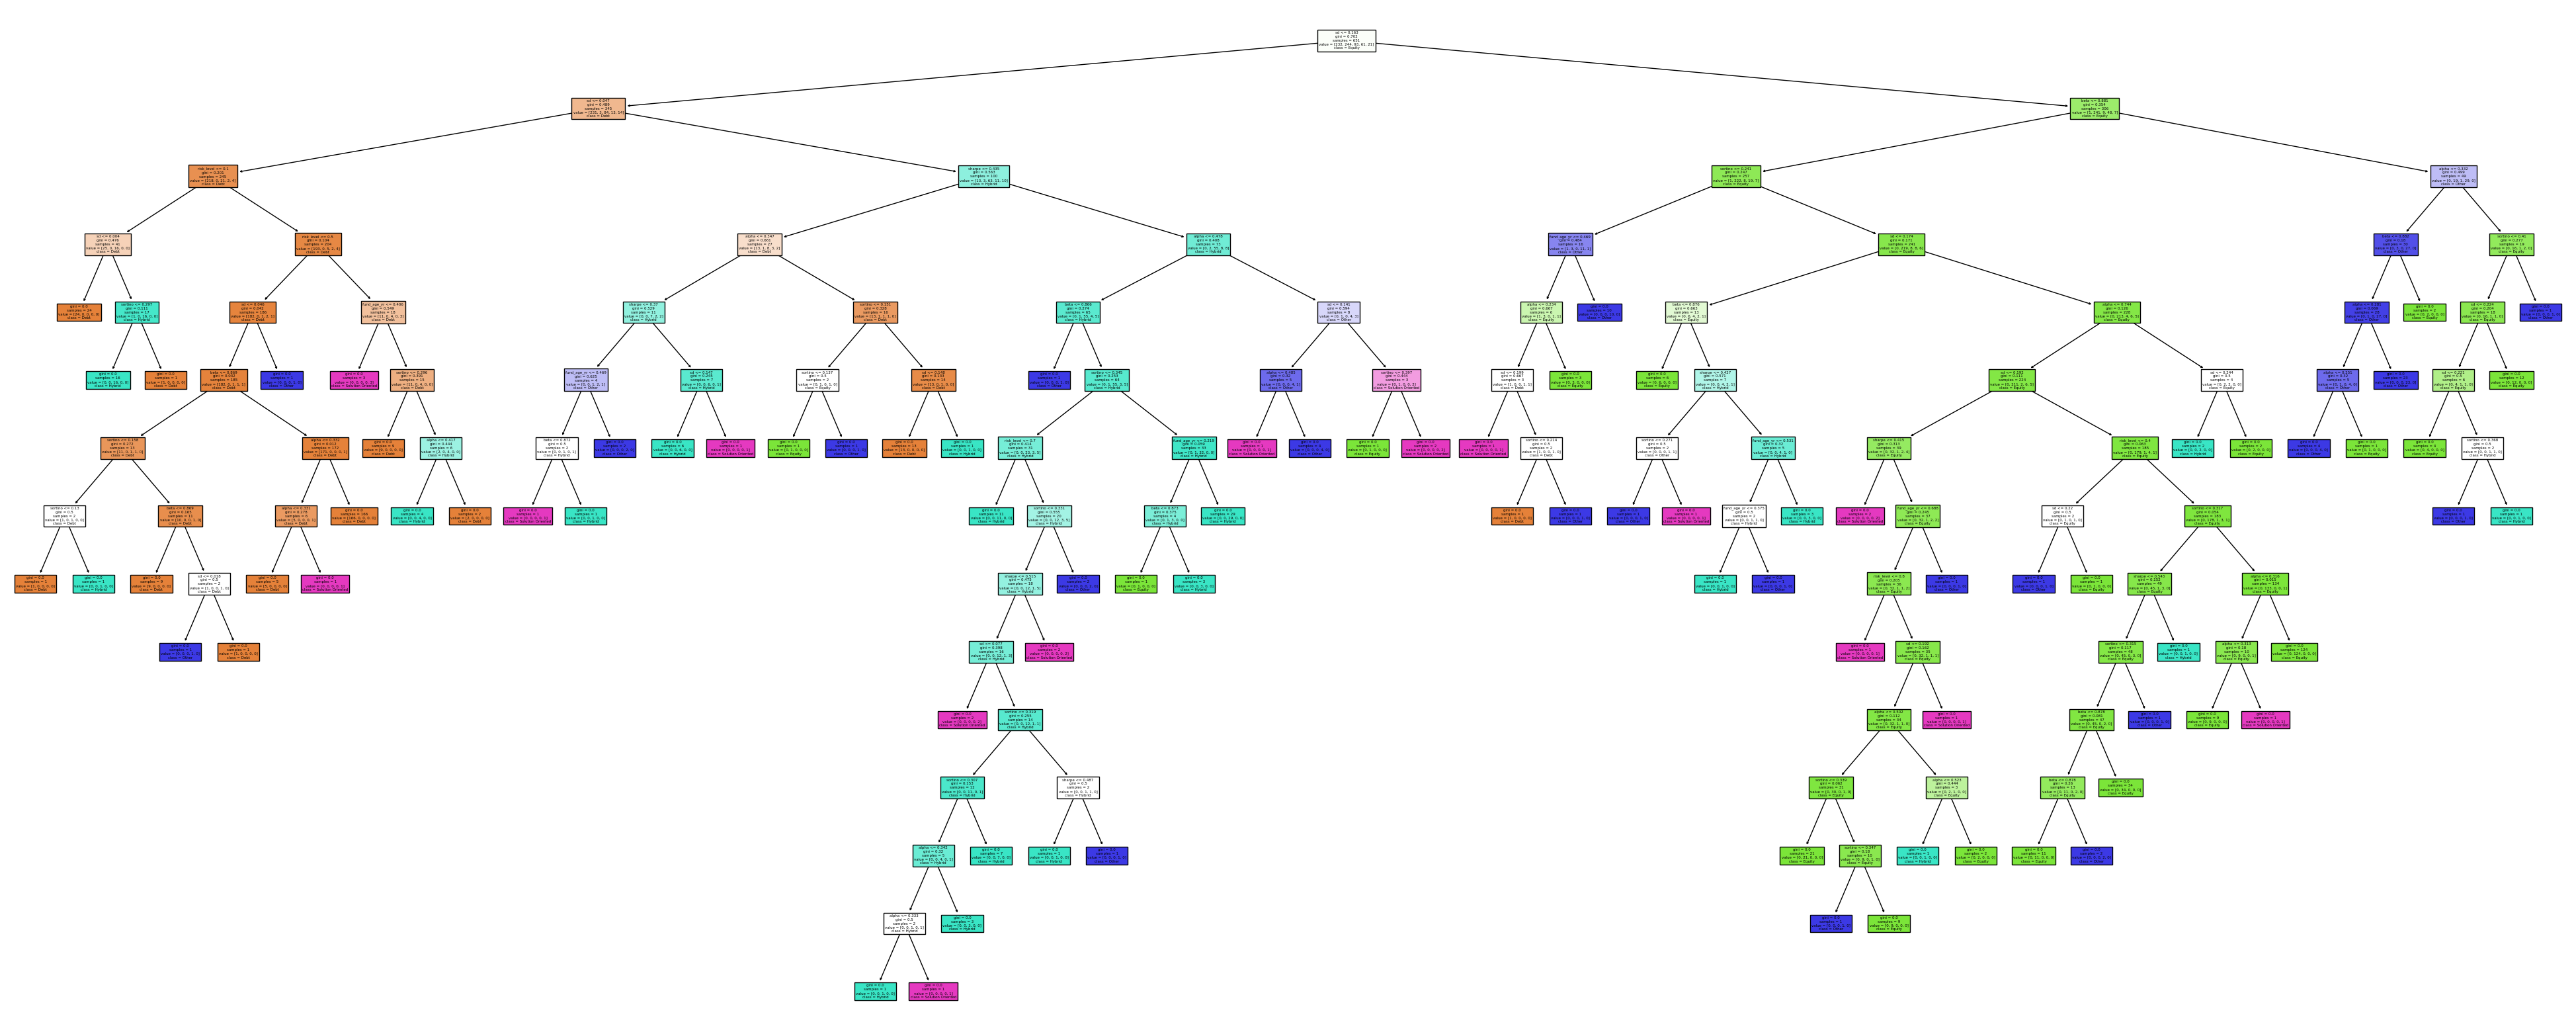

In [85]:
# Visualizing the decision tree
plt.figure(figsize=(50,20))
plot_tree(clf, filled=True, feature_names=['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level'], 
          class_names=(['Debt', 'Equity', 'Hybrid', 'Other', 'Solution Oriented']))
plt.show()

# DecisionTreeRegressor

In [86]:
# Assuming you have your dataset loaded into a pandas DataFrame called 'dataset'
# Features: 'fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe'
# Dependent variable: 'risk_level'

# Splitting the data into features and target variable
# Select relevant features (X) and target variable (Y)
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe']]
y = dataset["risk_level"]

In [87]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Training the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
# Making predictions
y_pred = regressor.predict(X_test)
train_predictions = regressor.predict(X_train)

# Evaluating the model
test_mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, train_predictions)


print("Test MSE:", test_mse)
print("Training MSE:", train_mse)
print("Test R-squared:", r2)
print("Training R-squared:", train_r2)

Test MSE: 0.01907474646300239
Training MSE: 5.7055080096554784e-05
Test R-squared: 0.8529898418570993
Training R-squared: 0.9995675111824652


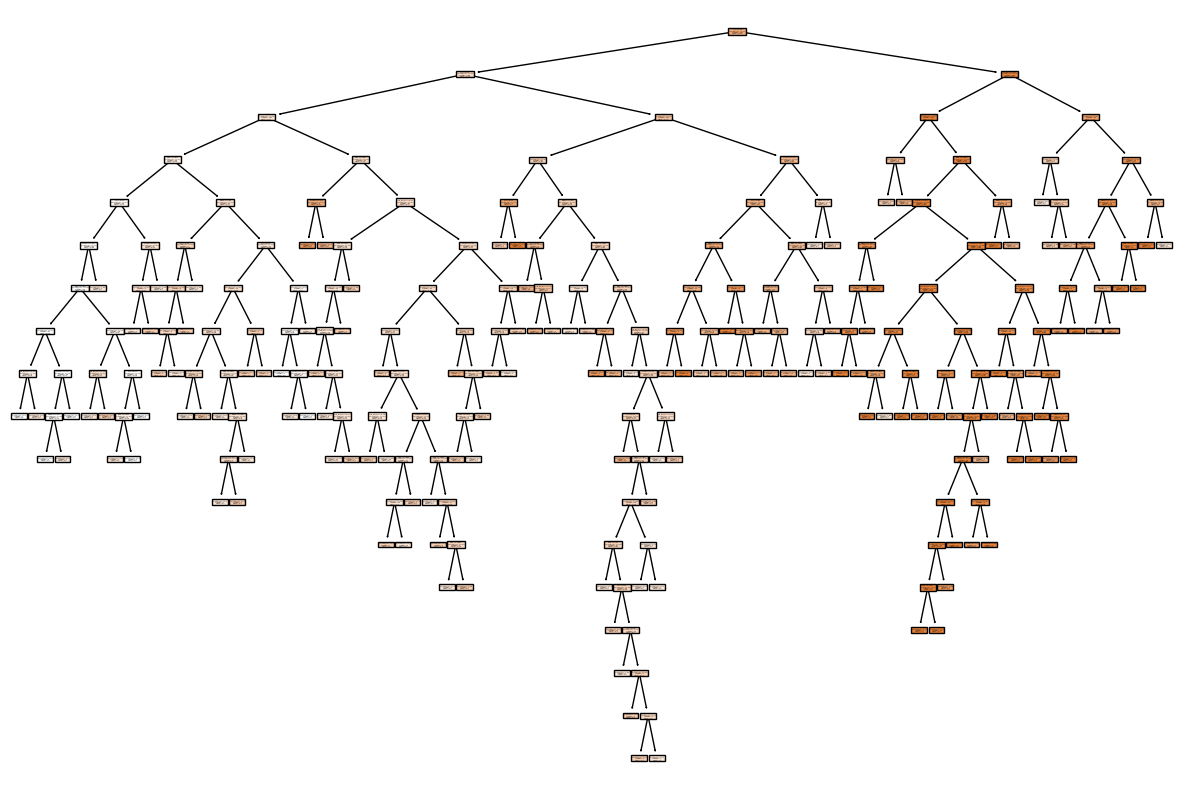

In [90]:
# Plotting the decision tree (if needed)
plt.figure(figsize=(15,10))
plot_tree(regressor, filled=True, feature_names=(['fund_age_yr','sortino', 'alpha', 'sd', 'beta', 'sharpe',
                                                  'expense_ratio', 'fund_size_cr']), class_names=(['risk_level']))
plt.show()

# DecisionTreeClassifier
(with labelling)

In [91]:
df0= dataset[dataset.risk_level<=3]
df1=dataset[dataset.risk_level>3]

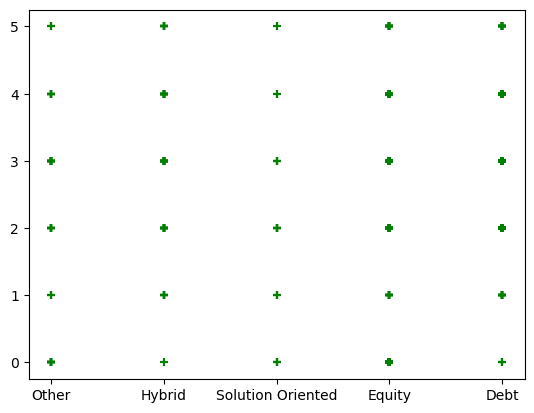

In [92]:
plt.scatter(df0['category'], df0['rating'],color="green",marker='+')
plt.scatter(df1['category'], df1['rating'],color="blue",marker='.')

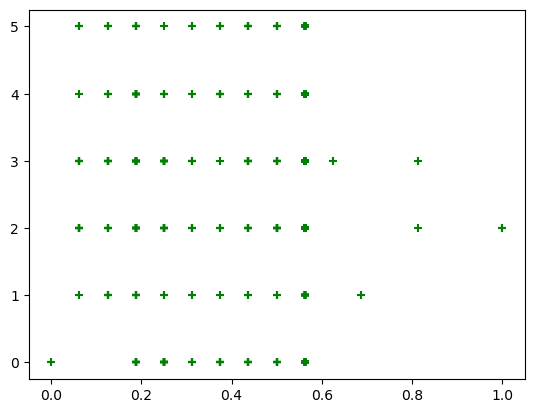

In [93]:
plt.scatter(df0['fund_age_yr'], df0['rating'],color="green",marker='+')
plt.scatter(df1['fund_age_yr'], df1['rating'],color="blue",marker='.')

In [94]:
y = dataset['category']

In [95]:
dataset['category'].unique()

array(['Other', 'Hybrid', 'Solution Oriented', 'Equity', 'Debt'],
      dtype=object)

In [96]:
le_sd = LabelEncoder()
le_beta = LabelEncoder()
le_sharpe = LabelEncoder()
le_alpha = LabelEncoder()

In [97]:
dataset['sd_n'] = le_sd.fit_transform(dataset['sd'])
dataset['beta_n'] = le_beta.fit_transform(dataset['beta'])
dataset['sharpe_n'] = le_sharpe.fit_transform(dataset['sharpe'])
dataset['alpha_n'] = le_alpha.fit_transform(dataset['alpha'])

In [98]:
dataset

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,sd_n,beta_n,sharpe_n,alpha_n
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.104247,0.000134,0.5625,Kaustubh Gupta,0.145746,0.384236,0.117753,...,3,Other,FoFs Domestic,4.0,6.5,6.900000,221,15,32,276
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.138996,0.075121,0.5625,Lovelish Solanki,0.216179,0.366749,0.005810,...,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000,31,43,110,231
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.204633,0.002710,0.5625,Vinod Narayan Bhat,0.363319,0.394828,0.133118,...,3,Other,FoFs Domestic,2.0,18.9,9.700000,231,54,141,308
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.293436,0.011124,0.1875,Atul Penkar,0.275453,0.172167,0.190058,...,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.747059,336,73,89,4
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.235521,0.111896,0.5625,Mohit Sharma,0.380753,0.378079,0.130536,...,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000,228,55,138,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.370656,0.088793,0.5625,Amandeep Chopra,0.295676,0.351724,0.087669,...,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.200000,201,31,128,183
810,UTI-Value Opportunities Fund,500,5000,0.447876,0.118101,0.5625,Vetri Subramaniam,0.347280,0.396305,0.198192,...,4,Equity,Value Funds,1.7,27.2,12.200000,363,80,148,314
811,WhiteOak Capital Liquid Fund,500,500,0.100386,0.003411,0.1875,Piyush Baranwal,0.094142,0.351970,0.001549,...,1,Debt,Liquid Mutual Funds,5.3,3.8,6.385446,7,59,10,184
812,WhiteOak Capital Overnight Fund,500,500,0.084942,0.000204,0.1875,Piyush Baranwal,0.094142,0.351970,0.001549,...,1,Debt,Overnight Mutual Funds,1.7,32.4,13.300000,7,59,10,184


In [99]:
X = dataset[['sd', 'beta', 'sharpe', 'alpha']]
# Assuming interested in predicting returns_1yr
y = dataset["category"]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [101]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [102]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
model.score(X_test, y_test)

0.8098159509202454

In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')

array([0.84662577, 0.88957055, 0.80981595, 0.82716049])

In [105]:
model.predict([[363,80,148,314]])

/Users/rupeshkumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Equity'], dtype=object)

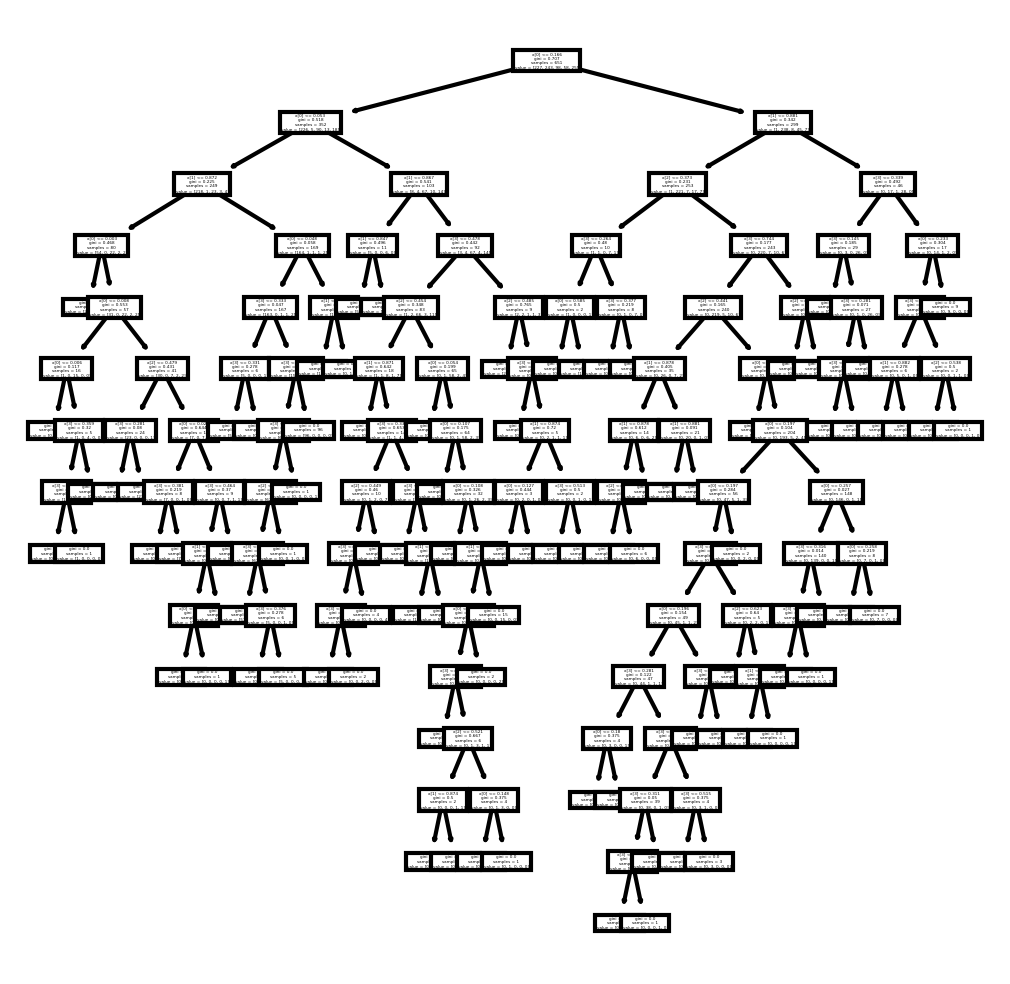

In [106]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi =300)

tree.plot_tree(model);
fig.savefig('image.png')

# KNN

In [107]:
X = dataset[['sd', 'beta', 'sharpe', 'alpha']]
# Assuming interested in predicting returns_1yr
y = dataset["category"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [111]:
from sklearn import metrics
# write your code here

y_pred = neigh.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))



Classification Report:
                   precision    recall  f1-score   support

             Debt       0.86      0.96      0.91        50
           Equity       0.86      0.89      0.88        64
           Hybrid       0.64      0.61      0.62        23
            Other       0.56      0.53      0.54        19
Solution Oriented       1.00      0.14      0.25         7

         accuracy                           0.80       163
        macro avg       0.78      0.63      0.64       163
     weighted avg       0.80      0.80      0.78       163

[[48  0  1  1  0]
 [ 0 57  2  5  0]
 [ 6  2 14  1  0]
 [ 2  4  3 10  0]
 [ 0  3  2  1  1]]
Train set Accuracy:  0.8663594470046083
Test set Accuracy:  0.7975460122699386


# RandomForest


In [112]:
X = dataset[['sd', 'beta', 'sharpe', 'alpha']]
# Assuming interested in predicting returns_1yr
y = dataset["category"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Test_Accuracy:", accuracy)
print("Training Accuracy:", train_accuracy)

Test_Accuracy: 0.8895705521472392
Training Accuracy: 1.0


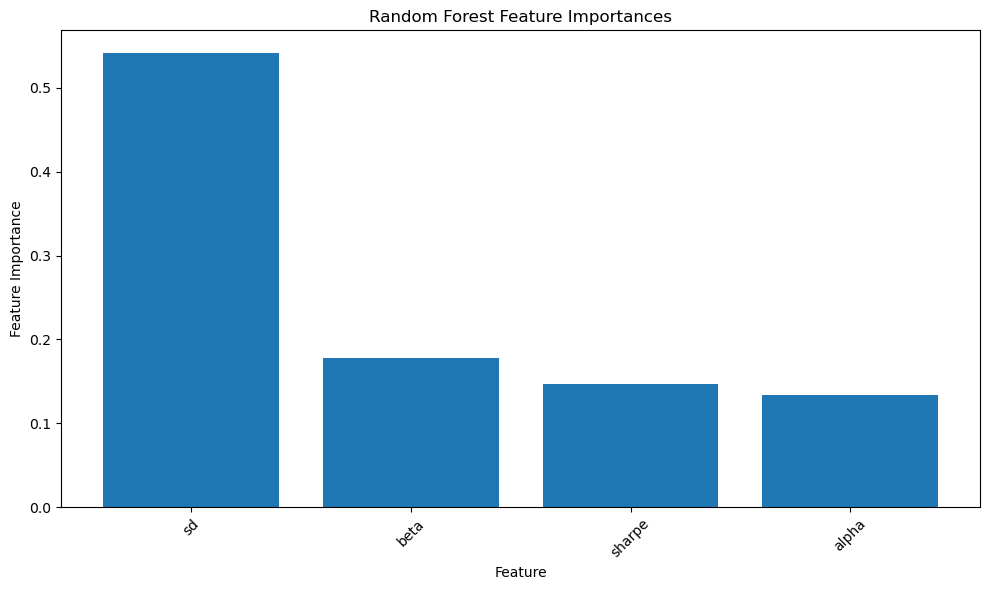

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have trained a Random Forest classifier and stored it in rf_classifier
# Replace X_train, y_train with your training data
# Replace feature_names with the names of your features

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Plot feature importances
feature_names= ['sd', 'beta', 'sharpe', 'alpha']
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), sorted_features, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Comparision between models

MinMaxScaler: It's like adjusting numbers so they all fit nicely between 0 and 1, making it easier to compare them.

Lasso: It's like simplifying things by setting some coefficients to zero, focusing only on the most important features.

Ridge: It's like gently nudging numbers towards zero to prevent them from getting too large, especially useful when features are related.

Linear Regression: It's like drawing a straight line through data points to predict future outcomes based on past trends.

Logistic Regression: It's like figuring out the chance of something happening based on different factors.

Decision Tree Classifier: It's like making a yes/no flowchart to classify things into different groups based on their features.

Decision Tree Regressor: It's like predicting a numerical outcome by breaking down data into smaller and smaller chunks based on features.

KNN Classifier: It's like looking at the neighbors to decide which group something belongs to.

Random Forest: It's like asking a bunch of decision trees for their opinions and then taking a vote to make a prediction.

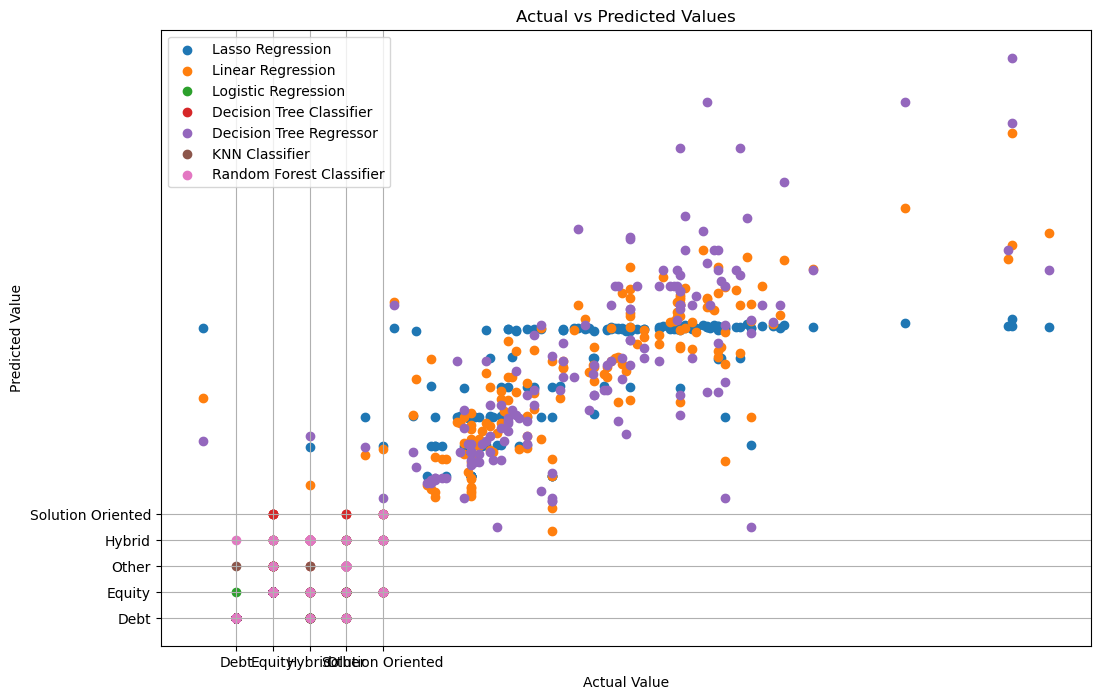

Lasso Regression MSE: 7.890817474762426
Linear Regression MSE: 5.0455286418415675
Logistic Regression Accuracy: 0.7423312883435583
Decision Tree Classifier Accuracy: 0.852760736196319
Decision Tree Regressor MSE: 6.386256605736563
KNN Classifier Accuracy: 0.8220858895705522
Random Forest Classifier Accuracy: 0.8957055214723927


In [117]:
# Assuming 'features' are the features of the dataset and 'target' is the target variable
X = dataset[['fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe','risk_level', 'expense_ratio', 'fund_size_cr']]
y_regression = dataset['returns_5yr']  # for linear regression and decision tree regressor
y_classification = dataset["category"]  # for logistic regression, decision tree classifier, KNN, and random forest


# Split the data into training and testing sets
X_train, X_test, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.2, random_state=42)
_, _, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Train models
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train_regression)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train_regression)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train_classification)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train_classification)

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train_regression)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train_classification)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train_classification)

# Predictions
lasso_pred = lasso.predict(X_test)
linear_reg_pred = linear_reg.predict(X_test)
logistic_reg_pred = logistic_reg.predict(X_test)
decision_tree_classifier_pred = decision_tree_classifier.predict(X_test)
decision_tree_regressor_pred = decision_tree_regressor.predict(X_test)
knn_classifier_pred = knn_classifier.predict(X_test)
random_forest_classifier_pred = random_forest_classifier.predict(X_test)

# Calculate evaluation metrics
lasso_mse = mean_squared_error(y_test_regression, lasso_pred)
linear_reg_mse = mean_squared_error(y_test_regression, linear_reg_pred)
logistic_reg_accuracy = accuracy_score(y_test_classification, logistic_reg_pred)
decision_tree_classifier_accuracy = accuracy_score(y_test_classification, decision_tree_classifier_pred)
decision_tree_regressor_mse = mean_squared_error(y_test_regression, decision_tree_regressor_pred)
knn_classifier_accuracy = accuracy_score(y_test_classification, knn_classifier_pred)
random_forest_classifier_accuracy = accuracy_score(y_test_classification, random_forest_classifier_pred)

# Plot scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(y_test_regression, lasso_pred, label='Lasso Regression')
plt.scatter(y_test_regression, linear_reg_pred, label='Linear Regression')
plt.scatter(y_test_classification, logistic_reg_pred, label='Logistic Regression')
plt.scatter(y_test_classification, decision_tree_classifier_pred, label='Decision Tree Classifier')
plt.scatter(y_test_regression, decision_tree_regressor_pred, label='Decision Tree Regressor')
plt.scatter(y_test_classification, knn_classifier_pred, label='KNN Classifier')
plt.scatter(y_test_classification, random_forest_classifier_pred, label='Random Forest Classifier')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print evaluation metrics
print("Lasso Regression MSE:", lasso_mse)
print("Linear Regression MSE:", linear_reg_mse)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
print("Decision Tree Classifier Accuracy:", decision_tree_classifier_accuracy)
print("Decision Tree Regressor MSE:", decision_tree_regressor_mse)
print("KNN Classifier Accuracy:", knn_classifier_accuracy)
print("Random Forest Classifier Accuracy:", random_forest_classifier_accuracy)

If your main concern is accurately predicting risk levels of mutual funds (regression task), you might prioritize models with lower MSE, such as Lasso Regression, Linear Regression, or Decision Tree Regressor.

If your main goal is to accurately classify mutual fund categories (classification task), you might prioritize models with higher accuracy, such as Logistic Regression, Decision Tree Classifier, KNN Classifier, or Random Forest Classifier.

# Conclusion

To accurately predict risk level linear regression is best

To accurately classify mutual fund by category Random Forest is best